# **New York City Yellow Taxi Data**
**Submission done By:** Shubham Kapoor future data scientist 

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [15]:
# Import warnings
import warnings
warnings.filterwarnings("ignore")

In [17]:
# Import the libraries you will be using for analysis
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option("display.max_columns", 30)

In [18]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [23]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

In [25]:
df = pd.read_parquet("trip_records\\2023-1.parquet")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,0.97,1.0,N,161,141,2,9.3,1.00,0.5,0.00,0.0,1.0,14.30,2.5,0.00
1,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.10,1.0,N,43,237,1,7.9,1.00,0.5,4.00,0.0,1.0,16.90,2.5,0.00
2,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,2.51,1.0,N,48,238,1,14.9,1.00,0.5,15.00,0.0,1.0,34.90,2.5,0.00
3,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,1.90,1.0,N,138,7,1,12.1,7.25,0.5,0.00,0.0,1.0,20.85,0.0,1.25
4,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,1.43,1.0,N,107,79,1,11.4,1.00,0.5,3.28,0.0,1.0,19.68,2.5,0.00


In [27]:
df.shape

(3041714, 19)

In [29]:
df.shape[0]

3041714

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [36]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [38]:
# from google.colab import drive
# drive.mount('/content/drive')

In [40]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files

import os
import pandas as pd

# Set relative data folder path
data_folder = "trip_records"

# Get all parquet files in the folder
file_list = sorted(
    [f for f in os.listdir(data_folder) if f.endswith('.parquet')],
    key=lambda x: int(x.split('-')[1].split('.')[0])
)

# Initialize final DataFrame
df = pd.DataFrame()

for file_name in file_list:
    try:
        file_path = os.path.join(data_folder, file_name)
        print(f"Processing: {file_name}")

        df_file = pd.read_parquet(file_path)

        if 'tpep_pickup_datetime' not in df_file.columns:
            print(f"Skipping {file_name}: 'tpep_pickup_datetime' column missing.")
            continue

        df_file['tpep_pickup_datetime'] = pd.to_datetime(df_file['tpep_pickup_datetime'])

        sampled_data = pd.DataFrame()

        for date in df_file['tpep_pickup_datetime'].dt.date.unique():
            df_date = df_file[df_file['tpep_pickup_datetime'].dt.date == date]
            for hour in range(24):
                df_hour = df_date[df_date['tpep_pickup_datetime'].dt.hour == hour]
                if not df_hour.empty:
                    df_sample = df_hour.sample(frac=0.05, random_state=1)
                    sampled_data = pd.concat([sampled_data, df_sample], ignore_index=True)

        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error processing {file_name}: {e}")

Processing: 2023-1.parquet
Processing: 2023-2.parquet
Processing: 2023-3.parquet
Processing: 2023-4.parquet
Processing: 2023-5.parquet
Processing: 2023-6.parquet
Processing: 2023-7.parquet
Processing: 2023-8.parquet
Processing: 2023-9.parquet
Processing: 2023-10.parquet
Processing: 2023-11.parquet
Processing: 2023-12.parquet


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [43]:
print(len(df)) 

1896400


In [45]:
#changing1896400 to  300000 to 250000
df = df.sample(n=300000, random_state=42).reset_index(drop=True)
print(len(df)) 

300000


In [46]:
# Store the df in csv/parquet
# df.to_parquet('')

In [47]:
# Saving To Parquet
output_file = "sampled_2023_data.parquet"
df.to_parquet(output_file)

# Show first few rows
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,1,2023-10-02 18:05:40,2023-10-02 18:06:21,1.0,2.00,5.0,Y,231,231,3,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,NaN,0.00
1,2,2023-01-10 14:04:06,2023-01-10 14:31:02,1.0,5.82,1.0,N,239,13,1,31.0,0.00,0.5,7.00,0.00,1.0,42.00,2.5,0.0,NaN
2,1,2023-07-11 20:14:23,2023-07-11 20:39:38,4.0,11.30,1.0,N,138,48,1,46.4,10.25,0.5,12.90,6.55,1.0,77.60,2.5,NaN,1.75
3,2,2023-04-12 08:47:53,2023-04-12 08:59:47,1.0,1.35,1.0,N,170,234,1,12.8,0.00,0.5,0.00,0.00,1.0,16.80,2.5,NaN,0.00
4,1,2023-12-08 15:53:46,2023-12-08 16:25:29,1.0,1.50,1.0,N,233,68,1,19.8,5.00,0.5,5.25,0.00,1.0,31.55,2.5,NaN,0.00


In [50]:
df.shape

(300000, 20)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        290174 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             290174 non-null  float64       
 6   store_and_fwd_flag     290174 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  floa

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [56]:
# Load the new data file (relative path)
df = pd.read_parquet("sampled_2023_data.parquet", engine='pyarrow')

In [58]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,1,2023-10-02 18:05:40,2023-10-02 18:06:21,1.0,2.00,5.0,Y,231,231,3,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,NaN,0.00
1,2,2023-01-10 14:04:06,2023-01-10 14:31:02,1.0,5.82,1.0,N,239,13,1,31.0,0.00,0.5,7.00,0.00,1.0,42.00,2.5,0.0,NaN
2,1,2023-07-11 20:14:23,2023-07-11 20:39:38,4.0,11.30,1.0,N,138,48,1,46.4,10.25,0.5,12.90,6.55,1.0,77.60,2.5,NaN,1.75
3,2,2023-04-12 08:47:53,2023-04-12 08:59:47,1.0,1.35,1.0,N,170,234,1,12.8,0.00,0.5,0.00,0.00,1.0,16.80,2.5,NaN,0.00
4,1,2023-12-08 15:53:46,2023-12-08 16:25:29,1.0,1.50,1.0,N,233,68,1,19.8,5.00,0.5,5.25,0.00,1.0,31.55,2.5,NaN,0.00


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        290174 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             290174 non-null  float64       
 6   store_and_fwd_flag     290174 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [65]:
# Fix the index and drop any columns that are not needed
columns_to_drop = ['store_and_fwd_flag', 'mta_tax', 'tolls_amount']
df.drop(columns=columns_to_drop, inplace=True)
df.head() 

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,1,2023-10-02 18:05:40,2023-10-02 18:06:21,1.0,2.00,5.0,231,231,3,0.0,0.00,0.00,0.0,0.00,0.0,NaN,0.00
1,2,2023-01-10 14:04:06,2023-01-10 14:31:02,1.0,5.82,1.0,239,13,1,31.0,0.00,7.00,1.0,42.00,2.5,0.0,NaN
2,1,2023-07-11 20:14:23,2023-07-11 20:39:38,4.0,11.30,1.0,138,48,1,46.4,10.25,12.90,1.0,77.60,2.5,NaN,1.75
3,2,2023-04-12 08:47:53,2023-04-12 08:59:47,1.0,1.35,1.0,170,234,1,12.8,0.00,0.00,1.0,16.80,2.5,NaN,0.00
4,1,2023-12-08 15:53:46,2023-12-08 16:25:29,1.0,1.50,1.0,233,68,1,19.8,5.00,5.25,1.0,31.55,2.5,NaN,0.00


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        290174 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             290174 non-null  float64       
 6   PULocationID           300000 non-null  int64         
 7   DOLocationID           300000 non-null  int64         
 8   payment_type           300000 non-null  int64         
 9   fare_amount            300000 non-null  float64       
 10  extra                  300000 non-null  float64       
 11  tip_amount             300000 non-null  float64       
 12  improvement_surcharge  300000 non-null  floa

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [70]:
# Step 1: Combine both columns without filling NaNs
df["airport_fee_combined"] = df["airport_fee"].combine_first(df["Airport_fee"])

# Step 2: Drop the original columns
df.drop(columns=["airport_fee", "Airport_fee"], inplace=True)

# Step 3: See the result
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
0,1,2023-10-02 18:05:40,2023-10-02 18:06:21,1.0,2.00,5.0,231,231,3,0.0,0.00,0.00,0.0,0.00,0.0,0.00
1,2,2023-01-10 14:04:06,2023-01-10 14:31:02,1.0,5.82,1.0,239,13,1,31.0,0.00,7.00,1.0,42.00,2.5,0.00
2,1,2023-07-11 20:14:23,2023-07-11 20:39:38,4.0,11.30,1.0,138,48,1,46.4,10.25,12.90,1.0,77.60,2.5,1.75
3,2,2023-04-12 08:47:53,2023-04-12 08:59:47,1.0,1.35,1.0,170,234,1,12.8,0.00,0.00,1.0,16.80,2.5,0.00
4,1,2023-12-08 15:53:46,2023-12-08 16:25:29,1.0,1.50,1.0,233,68,1,19.8,5.00,5.25,1.0,31.55,2.5,0.00


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        290174 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             290174 non-null  float64       
 6   PULocationID           300000 non-null  int64         
 7   DOLocationID           300000 non-null  int64         
 8   payment_type           300000 non-null  int64         
 9   fare_amount            300000 non-null  float64       
 10  extra                  300000 non-null  float64       
 11  tip_amount             300000 non-null  float64       
 12  improvement_surcharge  300000 non-null  floa

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [75]:
# Step 1: Check negative values in each column
numeric_df = df.select_dtypes(include='number')
print((numeric_df < 0).sum())

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    2
tip_amount               0
improvement_surcharge    7
total_amount             7
congestion_surcharge     4
airport_fee_combined     2
dtype: int64


In [77]:
(df.select_dtypes(include='number') < 0).mean() * 100

VendorID                 0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000667
tip_amount               0.000000
improvement_surcharge    0.002333
total_amount             0.002333
congestion_surcharge     0.001333
airport_fee_combined     0.000667
dtype: float64

In [79]:
# check where values of fare amount are negative

In [81]:
 # How many negative values?
(df['fare_amount'] < 0).sum()

0

In [83]:
print((df['fare_amount'] < 0).sum())  # How many negative values?
print(df['fare_amount'].min())        # What's the minimum fare amount?

0
0.0


In [85]:
print(df[df['fare_amount'] < 0])

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, tip_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee_combined]
Index: []


In [87]:
negative_fare_rows = df[df['fare_amount'] < 0]
print(negative_fare_rows)

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, tip_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee_combined]
Index: []


In [89]:
# Get rows where any numeric value is negative
rows_with_negatives = df[(numeric_df < 0).any(axis=1)]
# Show counts of RatecodeID in those rows
print(rows_with_negatives['RatecodeID'].value_counts(dropna=False))

RatecodeID
1.0    5
5.0    2
2.0    1
Name: count, dtype: int64


Did you notice something different in the `RatecodeID` column for above records?

In [92]:
# Analyse RatecodeID for the negative fare amounts
negative_fares = df[df['fare_amount'] < 0]
print(negative_fares['RatecodeID'].value_counts(dropna=False))

Series([], Name: count, dtype: int64)


In [94]:
# Find which columns have negative values
numeric_df = df.select_dtypes(include='number')
print((numeric_df < 0).sum())

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    2
tip_amount               0
improvement_surcharge    7
total_amount             7
congestion_surcharge     4
airport_fee_combined     2
dtype: int64


In [96]:
# fix these negative values
# List of columns that have some negative values
negative_columns = ['extra' , 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee_combined']

# Go through each column in the list
for column in negative_columns:
    # If any value is negative, change it to positive (absolute value)
    df[column] = df[column].abs()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
0,1,2023-10-02 18:05:40,2023-10-02 18:06:21,1.0,2.00,5.0,231,231,3,0.0,0.00,0.00,0.0,0.00,0.0,0.00
1,2,2023-01-10 14:04:06,2023-01-10 14:31:02,1.0,5.82,1.0,239,13,1,31.0,0.00,7.00,1.0,42.00,2.5,0.00
2,1,2023-07-11 20:14:23,2023-07-11 20:39:38,4.0,11.30,1.0,138,48,1,46.4,10.25,12.90,1.0,77.60,2.5,1.75
3,2,2023-04-12 08:47:53,2023-04-12 08:59:47,1.0,1.35,1.0,170,234,1,12.8,0.00,0.00,1.0,16.80,2.5,0.00
4,1,2023-12-08 15:53:46,2023-12-08 16:25:29,1.0,1.50,1.0,233,68,1,19.8,5.00,5.25,1.0,31.55,2.5,0.00


In [98]:
# Now checking for negative values
numeric_df = df.select_dtypes(include='number')
print((numeric_df < 0).sum())

VendorID                 0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
tip_amount               0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee_combined     0
dtype: int64


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [102]:
# Find the proportion of missing values in each column
missing_proportion = df.isnull().mean()

# Display the result
print(missing_proportion)

VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.032753
trip_distance            0.000000
RatecodeID               0.032753
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
tip_amount               0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.032753
airport_fee_combined     0.032753
dtype: float64


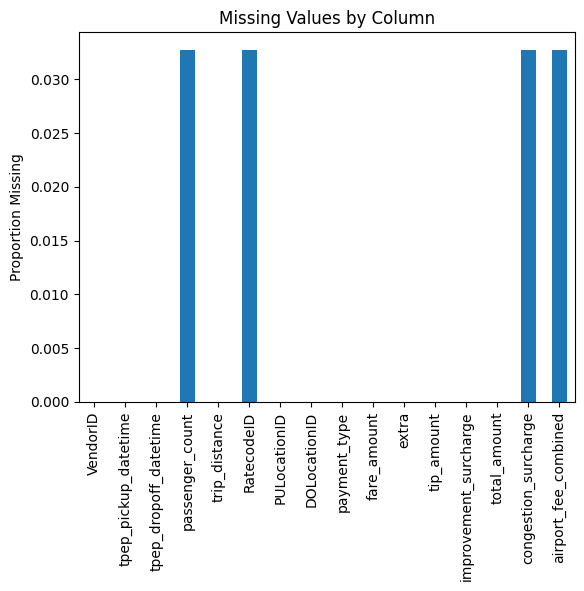

In [104]:
missing_proportion.plot.bar()
plt.ylabel('Proportion Missing')
plt.title('Missing Values by Column')
plt.show()

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [106]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'


In [107]:
# Show rows where passenger_count is missing
print(df[df['passenger_count'].isnull()])

        VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
8              1  2023-08-18 12:20:13   2023-08-18 12:23:27              NaN   
17             2  2023-02-04 11:50:59   2023-02-04 11:59:35              NaN   
33             1  2023-11-03 18:46:55   2023-11-03 18:52:00              NaN   
66             1  2023-11-02 19:49:20   2023-11-02 20:14:37              NaN   
69             2  2023-03-10 23:43:42   2023-03-10 23:59:27              NaN   
...          ...                  ...                   ...              ...   
299834         2  2023-09-03 13:48:36   2023-09-03 14:41:00              NaN   
299835         2  2023-12-16 14:14:01   2023-12-16 14:34:25              NaN   
299848         2  2023-04-01 12:41:00   2023-04-01 12:55:00              NaN   
299924         2  2023-05-07 17:11:00   2023-05-07 18:24:00              NaN   
299980         2  2023-12-19 15:24:06   2023-12-19 15:57:06              NaN   

        trip_distance  RatecodeID  PULo

In [110]:
print(df['passenger_count'].isnull().sum())

9826


In [113]:
df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)
print(df['passenger_count'].isnull().sum())

0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [117]:
# Fix missing values in 'RatecodeID'


In [119]:
# Checking for missing values in RatecodeID
print(df['RatecodeID'].value_counts())

RatecodeID
1.0     273612
2.0      11437
99.0      1790
5.0       1724
3.0        981
4.0        630
Name: count, dtype: int64


In [121]:
# Step 1: Replace missing values (NaN) in RatecodeID with 1 (most common code)
df['RatecodeID'].fillna(1, inplace=True)

# Step 2: Replace the invalid/outlier value 99 with 1
df['RatecodeID'] = df['RatecodeID'].replace(99, 1)

# Step 3: Check the counts after cleaning
print(df['RatecodeID'].value_counts())

RatecodeID
1.0    285228
2.0     11437
5.0      1724
3.0       981
4.0       630
Name: count, dtype: int64


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [124]:
# handle null values in congestion_surcharge
#Check which value appears the most (to decide imputation)

In [126]:
print(df['congestion_surcharge'].isnull().sum())

9826


In [128]:
df['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    267834
0.0     22339
0.5         1
Name: count, dtype: int64

In [130]:
df["congestion_surcharge"].fillna(df["congestion_surcharge"].mode()[0], inplace=True)

In [132]:
print(df['congestion_surcharge'].isnull().sum())

0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [135]:
# Again checking it 
# Proportion of missing values in each column
missing_values = df.isnull().mean()
print(missing_values[missing_values > 0])

airport_fee_combined    0.032753
dtype: float64


In [137]:
# Handle any remaining missing values
df['airport_fee_combined'].fillna(0, inplace=True)

In [139]:
# Check missing values in all columns
print(df.isnull().sum())

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
tip_amount               0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee_combined     0
dtype: int64


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [143]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns



In [145]:
# first take out  summary statistics of numerical columns
print(df.describe())

            VendorID        tpep_pickup_datetime       tpep_dropoff_datetime  \
count  300000.000000                      300000                      300000   
mean        1.736593  2023-07-03 04:24:52.586130  2023-07-03 04:42:21.616503   
min         1.000000         2023-01-01 00:03:37         2023-01-01 00:15:53   
25%         1.000000  2023-04-03 08:24:22.250000         2023-04-03 08:45:29   
50%         2.000000  2023-06-28 07:54:18.500000  2023-06-28 08:05:36.500000   
75%         2.000000  2023-10-06 22:36:26.500000  2023-10-06 22:57:17.500000   
max         6.000000         2023-12-31 23:53:25         2024-01-01 20:50:55   
std         0.445822                         NaN                         NaN   

       passenger_count  trip_distance     RatecodeID   PULocationID  \
count    300000.000000  300000.000000  300000.000000  300000.000000   
mean          1.358773       3.985275       1.073950     165.275180   
min           0.000000       0.000000       1.000000       1.00000

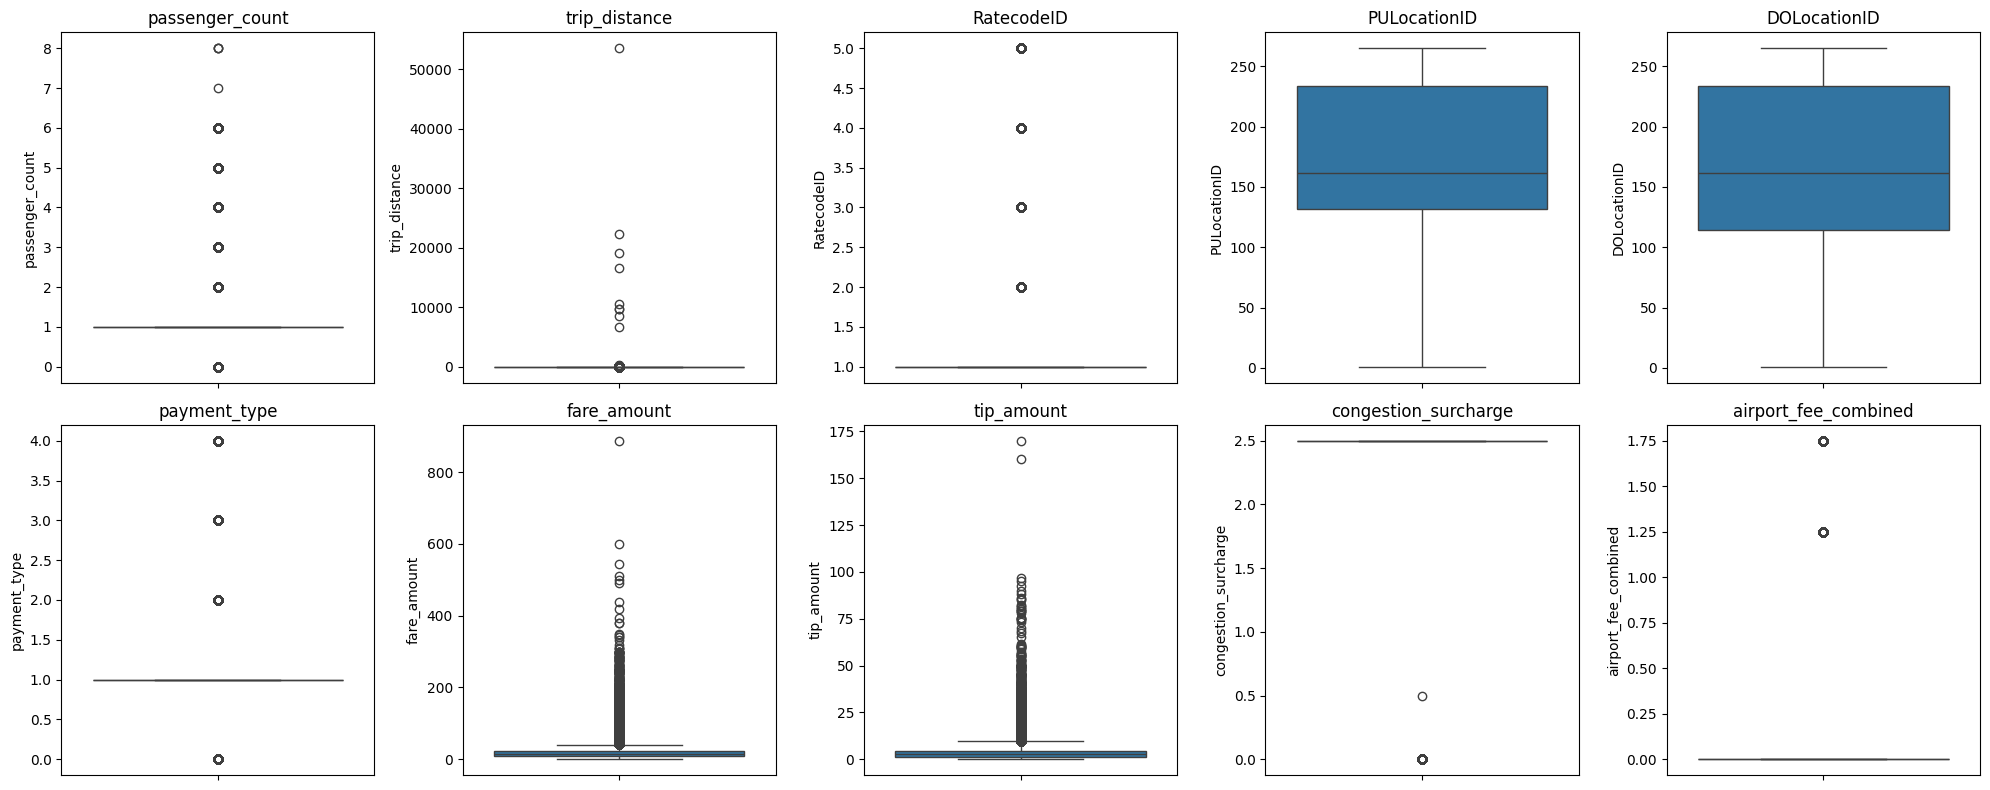

In [146]:
cols = ['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
        'payment_type', 'fare_amount', 'tip_amount', 'congestion_surcharge', 'airport_fee_combined']

fig, axs = plt.subplots(2, 5, figsize=(20, 8))  # 2 rows, 5 columns grid
axs = axs.flatten()

for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

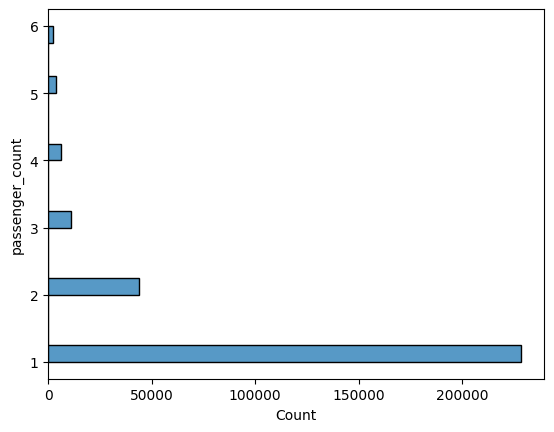

In [151]:
# remove passenger_count > 6
df = df[(df['passenger_count'] >= 1) & (df['passenger_count'] <= 6)]
sns.histplot(y=df['passenger_count'])
plt.show()

In [152]:
# Continue with outlier handling

In [153]:
# First Suggestion Remove trips with trip_distance nearly 0 but fare_amount > 300
df = df[~((df['trip_distance'] <= 0.1) & (df['fare_amount'] > 300))]

In [154]:
# Second Suggestion Remove trips where both trip_distance and fare_amount are 0 but pickup and dropoff zones differ
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]

In [155]:
# Third Suggestion Remove trips with trip_distance more than 250 miles (unrealistic long trips)
df = df[df['trip_distance'] <= 250]

In [156]:
# Fourth Suggestion Remove rows where payment_type is 0 (invalid)
df = df[df['payment_type'] != 0]

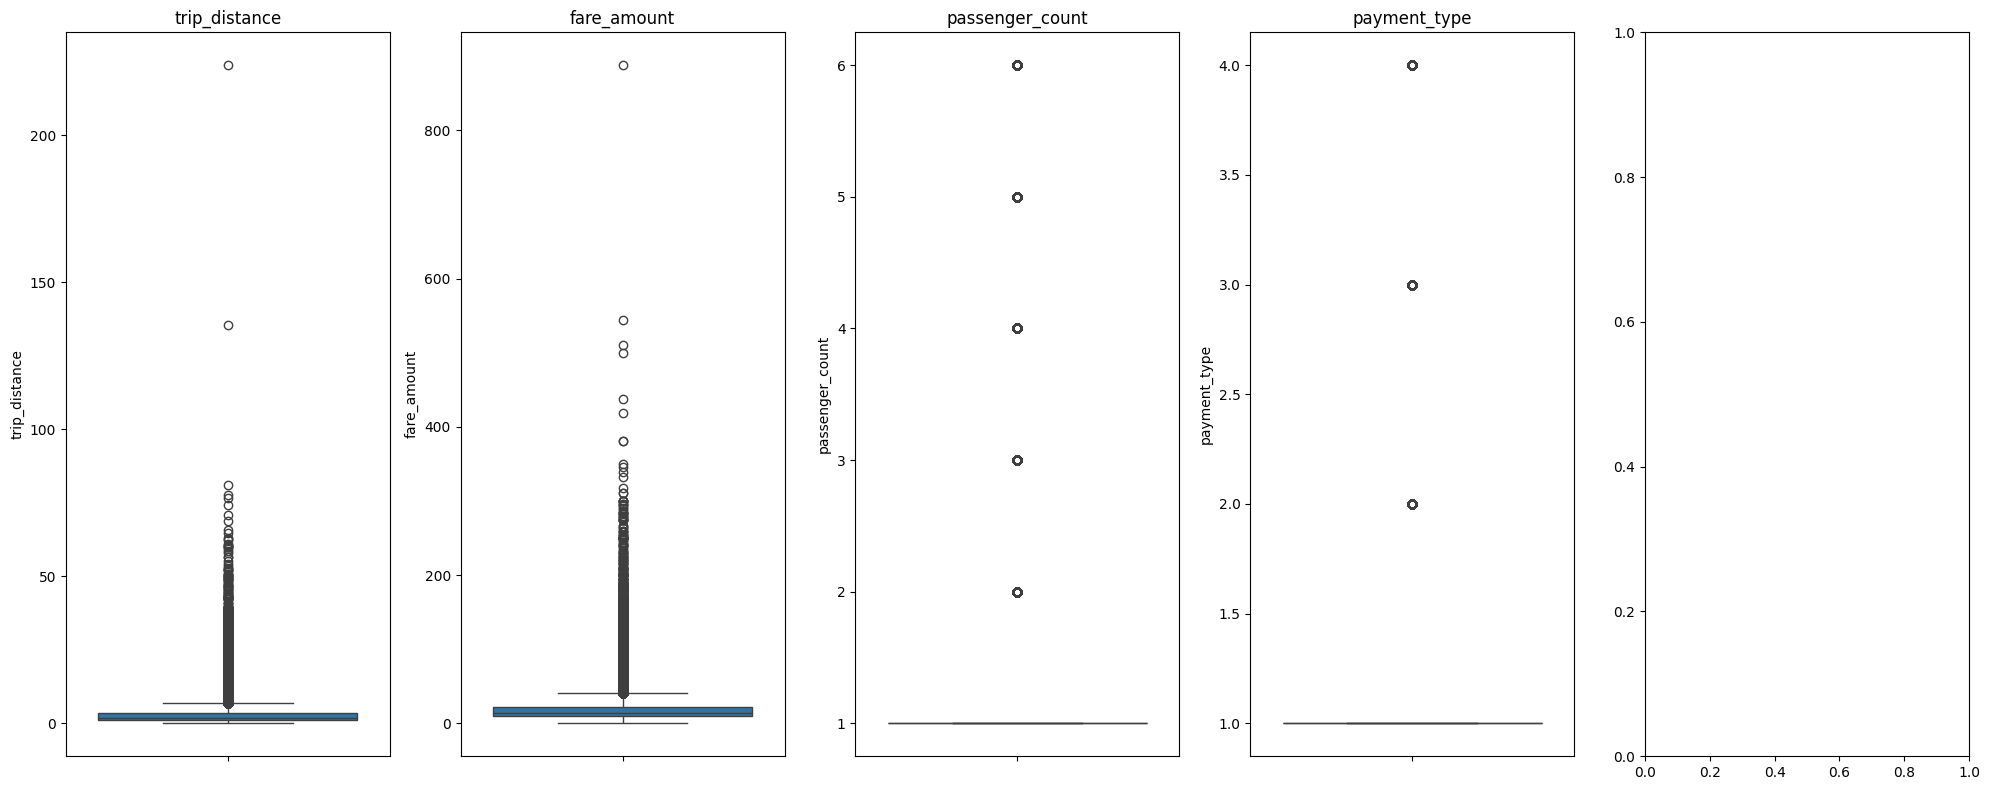

In [157]:
# After cleaning, now we  can visualize distributions or boxplots again to verify
cols = ['trip_distance', 'fare_amount', 'passenger_count', 'payment_type']

fig, axs = plt.subplots(1, 5, figsize=(20, 8))  # 2 rows, 5 columns grid
axs = axs.flatten()

for i, col in enumerate(cols):
    sns.boxplot(y=df[col], ax=axs[i])
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

In [158]:
# Find rows which are not from 2023 as we are only interested in 2023 data
outlier_years = df[(df['tpep_pickup_datetime'].dt.year != 2023) | (df['tpep_dropoff_datetime'].dt.year != 2023)]
outlier_years

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
205504,2,2023-12-31 21:29:00,2024-01-01 20:50:55,1.0,1.76,1.0,234,4,1,12.8,1.0,0.0,1.0,17.8,2.5,0.0
243570,2,2023-12-31 23:47:23,2024-01-01 00:03:20,1.0,4.98,1.0,151,68,1,23.3,1.0,1.0,1.0,29.3,2.5,0.0


In [159]:
# Drop the rows which are not from 2023
df.drop(outlier_years.index, inplace=True)

In [160]:
outliers_left = df[(df['tpep_pickup_datetime'].dt.year != 2023) | (df['tpep_dropoff_datetime'].dt.year != 2023)]
print(f"Outliers remaining after drop: {outliers_left.shape[0]}")

Outliers remaining after drop: 0


In [161]:
print('The amount of data that has a distance of less than 1 km (0.62 miles):', len(df[df['trip_distance'] < 0.62]))

The amount of data that has a distance of less than 1 km (0.62 miles): 24298


In [162]:
# Remove rows where trip_distance is less than 0.62 miles
df = df[df['trip_distance'] > 0.62]

In [163]:
print('The amount of data that has a distance of less than 1 km (0.62 miles):', len(df[df['trip_distance'] < 0.62]))

The amount of data that has a distance of less than 1 km (0.62 miles): 0


In [164]:
print('The amount of data that has a distance of more than (120 miles):', len(df[df['trip_distance'] > 120]))

The amount of data that has a distance of more than (120 miles): 2


In [165]:
# Do any columns need standardising?
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
tip_amount                      float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee_combined            float64
dtype: object

In [166]:
print("VendorID:", df['VendorID'].unique())
print("RatecodeID:", df['RatecodeID'].unique())
print("payment_type:", df['payment_type'].unique())

VendorID: [1 2]
RatecodeID: [5. 1. 2. 3. 4.]
payment_type: [3 1 2 4]


In [167]:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
count,260660.000000,260660,260660,260660.000000,260660.000000,260660.000000,260660.000000,260660.000000,260660.000000,260660.000000,260660.000000,260660.000000,260660.000000,260660.000000,260660.000000,260660.000000
mean,1.756591,2023-07-02 00:02:42.360572,2023-07-02 00:21:16.054009,1.396846,3.764720,1.065380,164.789527,163.647790,1.190282,20.764655,1.626943,3.754662,0.999667,30.182184,2.317226,0.155677
min,1.000000,2023-01-01 00:03:37,2023-01-01 00:15:53,1.000000,0.630000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2023-04-02 01:39:37.500000,2023-04-02 01:55:24.500000,1.000000,1.210000,1.000000,132.000000,113.000000,1.000000,10.000000,0.000000,1.000000,1.000000,16.800000,2.500000,0.000000
50%,2.000000,2023-06-26 11:32:15.500000,2023-06-26 11:48:06.500000,1.000000,1.940000,1.000000,161.000000,162.000000,1.000000,14.200000,1.000000,3.000000,1.000000,21.880000,2.500000,0.000000
75%,2.000000,2023-10-05 18:31:34.250000,2023-10-05 18:51:23.250000,1.000000,3.690000,1.000000,233.000000,234.000000,1.000000,23.300000,2.500000,4.650000,1.000000,31.990000,2.500000,0.000000
max,2.000000,2023-12-31 23:53:25,2023-12-31 23:59:21,6.000000,223.810000,5.000000,265.000000,265.000000,4.000000,887.800000,11.750000,95.000000,1.000000,899.600000,2.500000,1.750000
std,0.429141,NaN,NaN,0.889964,4.701514,0.333285,63.380581,70.173598,0.442311,18.299960,1.849222,4.073394,0.015718,23.123519,0.650790,0.483032


In [168]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols_to_scale = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined
count,260660.000000,260660,260660,260660.000000,2.606600e+05,260660.000000,260660.000000,260660.000000,260660.000000,2.606600e+05,260660.000000,2.606600e+05,260660.000000,2.606600e+05,260660.000000,260660.000000
mean,1.756591,2023-07-02 00:02:42.360572,2023-07-02 00:21:16.054009,1.396846,-2.502410e-17,1.065380,164.789527,163.647790,1.190282,4.090268e-16,1.626943,1.390228e-16,0.999667,3.731263e-16,2.317226,0.155677
min,1.000000,2023-01-01 00:03:37,2023-01-01 00:15:53,1.000000,-6.667482e-01,1.000000,1.000000,1.000000,1.000000,-1.134685e+00,0.000000,-9.217545e-01,0.000000,-1.305262e+00,0.000000,0.000000
25%,2.000000,2023-04-02 01:39:37.500000,2023-04-02 01:55:24.500000,1.000000,-5.433834e-01,1.000000,132.000000,113.000000,1.000000,-5.882349e-01,0.000000,-6.762585e-01,1.000000,-5.787272e-01,2.500000,0.000000
50%,2.000000,2023-06-26 11:32:15.500000,2023-06-26 11:48:06.500000,1.000000,-3.881140e-01,1.000000,161.000000,162.000000,1.000000,-3.587258e-01,1.000000,-1.852665e-01,1.000000,-3.590371e-01,2.500000,0.000000
75%,2.000000,2023-10-05 18:31:34.250000,2023-10-05 18:51:23.250000,1.000000,-1.589277e-02,1.000000,233.000000,234.000000,1.000000,1.385440e-01,2.500000,2.198018e-01,1.000000,7.818096e-02,2.500000,0.000000
max,2.000000,2023-12-31 23:53:25,2023-12-31 23:59:21,6.000000,4.680316e+01,5.000000,265.000000,265.000000,4.000000,4.737918e+01,11.750000,2.240036e+01,1.000000,3.759893e+01,2.500000,1.750000
std,0.429141,NaN,NaN,0.889964,1.000002e+00,0.333285,63.380581,70.173598,0.442311,1.000002e+00,1.849222,1.000002e+00,0.015718,1.000002e+00,0.650790,0.483032


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [170]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'tip_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee_combined']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [173]:
# Display the data types of all columns
print(df.dtypes)

VendorID                          int64
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
tip_amount                      float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee_combined            float64
dtype: object


In [174]:
# Automatically classify columns based on dtype
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
temporal_vars = df.select_dtypes(include=['datetime64']).columns.tolist()

print("Categorical Variables:", categorical_vars)
print("Numerical Variables:", numerical_vars)
print("Temporal Variables:", temporal_vars)

Categorical Variables: []
Numerical Variables: ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee_combined']
Temporal Variables: ['tpep_pickup_datetime', 'tpep_dropoff_datetime']


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

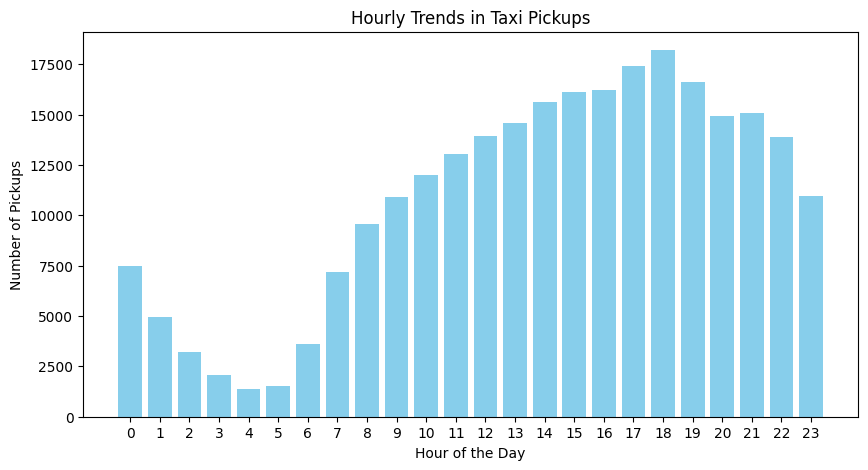

In [177]:
# Find and show the hourly trends in taxi pickups

# Extract the hour from the pickup datetime
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Calculate the number of pickups for each hour
hourly_pickups = df['pickup_hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.bar(hourly_pickups.index, hourly_pickups.values, color='skyblue')
plt.title('Hourly Trends in Taxi Pickups')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.show()

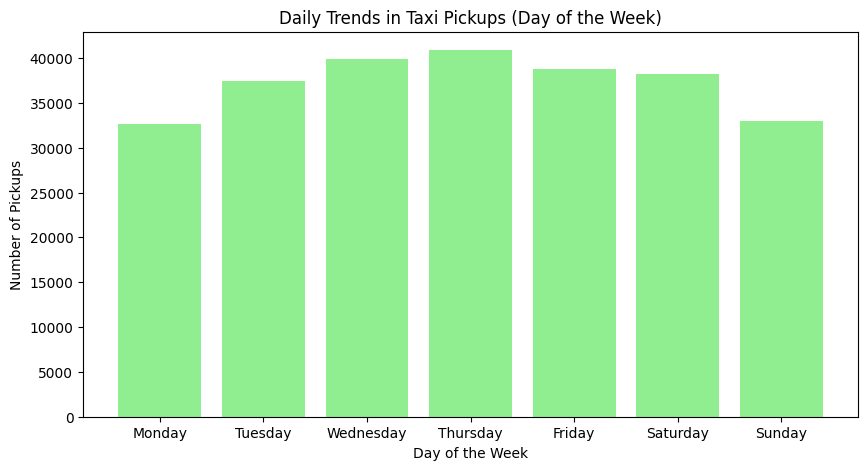

In [178]:
# Find and show the daily trends in taxi pickups (days of the week)

# Extract day of the week from pickup datetime (0=Monday, 6=Sunday)
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek

# Count pickups for each day of the week
daily_pickups = df['pickup_dayofweek'].value_counts().sort_index()

# Map numbers to day names for better readability
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,5))
plt.bar(day_names, daily_pickups.values, color='lightgreen')
plt.title('Daily Trends in Taxi Pickups (Day of the Week)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.show()

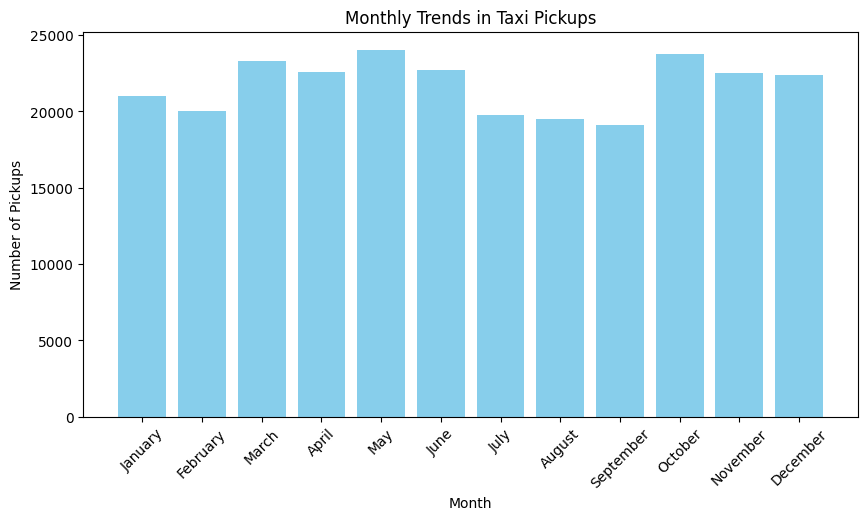

In [179]:
# Show the monthly trends in pickups
# Extract the month from pickup datetime
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Count pickups for each month
monthly_pickups = df['pickup_month'].value_counts().sort_index()

# Optional: Month names for better labels
import calendar
month_names = [calendar.month_name[m] for m in monthly_pickups.index]


plt.figure(figsize=(10,5))
plt.bar(month_names, monthly_pickups.values, color='skyblue')
plt.title('Monthly Trends in Taxi Pickups')
plt.xlabel('Month')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [182]:
financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']

# Show descriptive statistics
print(df[financial_columns].describe())

# Show count of zero or negative values for each column
for col in financial_columns:
    zero_neg_count = (df[col] <= 0).sum()
    print(f"Number of zero or negative values in {col}: {zero_neg_count}")


        fare_amount    tip_amount  total_amount  trip_distance
count  2.606600e+05  2.606600e+05  2.606600e+05   2.606600e+05
mean   4.090268e-16  1.390228e-16  3.731263e-16  -2.502410e-17
std    1.000002e+00  1.000002e+00  1.000002e+00   1.000002e+00
min   -1.134685e+00 -9.217545e-01 -1.305262e+00  -6.667482e-01
25%   -5.882349e-01 -6.762585e-01 -5.787272e-01  -5.433834e-01
50%   -3.587258e-01 -1.852665e-01 -3.590371e-01  -3.881140e-01
75%    1.385440e-01  2.198018e-01  7.818096e-02  -1.589277e-02
max    4.737918e+01  2.240036e+01  3.759893e+01   4.680316e+01
Number of zero or negative values in fare_amount: 185439
Number of zero or negative values in tip_amount: 166412
Number of zero or negative values in total_amount: 187987
Number of zero or negative values in trip_distance: 196901


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?
ANSWER -Yes, it is beneficial to create a copy of the DataFrame without zero or negative values in these important financial and distance columns for certain analyses, especially if those zero or negative values are errors or don’t make sense (like negative fare or tip). This helps to avoid skewing your insights or model results.


Reason: Zero or negative values in fare or tip may represent incomplete, canceled, or erroneous trips.

Benefit: Filtering them out creates a cleaner dataset for accurate analysis or modeling.

In [210]:
# Creating  a copy without zero or negative values in key columns
clean_df = df[(df['fare_amount'] > 0) & (df['tip_amount'] > 0) & (df['total_amount'] > 0) & (df['trip_distance'] > 0)].copy()

In [212]:
print("Zero or negative in fare_amount:", (clean_df['fare_amount'] <= 0).sum())
print("Zero or negative in tip_amount:", (clean_df['tip_amount'] <= 0).sum())
print("Zero or negative in total_amount:", (clean_df['total_amount'] <= 0).sum())
print("Zero or negative in trip_distance:", (clean_df['trip_distance'] <= 0).sum())

Zero or negative in fare_amount: 0
Zero or negative in tip_amount: 0
Zero or negative in total_amount: 0
Zero or negative in trip_distance: 0


In [214]:
print(len(df))       # Original row count
print(len(clean_df)) # Row count after removing zero/negative rows

260660
41966


In [216]:
print("Original df shape:", df.shape)
print("Cleaned df shape:", clean_df.shape)

Original df shape: (260660, 19)
Cleaned df shape: (41966, 19)


**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [219]:
# Create a df with non zero entries for the selected parameters.
non_zero_df = df[
    (df['fare_amount'] > 0) & 
    (df['tip_amount'] > 0) & 
    (df['total_amount'] > 0) & 
    (df['trip_distance'] > 0)
]
# Display the first few rows of the new DataFrame
non_zero_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined,pickup_hour,pickup_dayofweek,pickup_month
1,2,2023-01-10 14:04:06,2023-01-10 14:31:02,1.0,0.437154,1.0,239,13,1,0.559311,0.00,0.796717,1.0,0.511074,2.5,0.00,14,1,1
2,1,2023-07-11 20:14:23,2023-07-11 20:39:38,4.0,1.602738,1.0,138,48,1,1.400844,10.25,2.245144,1.0,2.050635,2.5,1.75,20,1,7
9,2,2023-09-26 04:39:27,2023-09-26 04:55:44,1.0,0.509471,1.0,237,80,1,0.291550,1.00,0.605231,1.0,0.308683,2.5,0.00,4,1,9
13,2,2023-03-14 20:44:50,2023-03-14 21:10:44,1.0,2.791719,2.0,132,107,1,2.690467,0.00,3.033186,1.0,2.928964,2.5,1.25,20,1,3
55,1,2023-12-13 15:22:41,2023-12-13 16:29:24,1.0,2.815116,2.0,264,107,1,2.690467,2.50,4.049539,1.0,3.070811,2.5,0.00,15,2,12


In [221]:
print("Original data shape:", df.shape)
print("Filtered data shape (without zero fare, tip, total, distance):", non_zero_df.shape)

Original data shape: (260660, 19)
Filtered data shape (without zero fare, tip, total, distance): (41966, 19)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

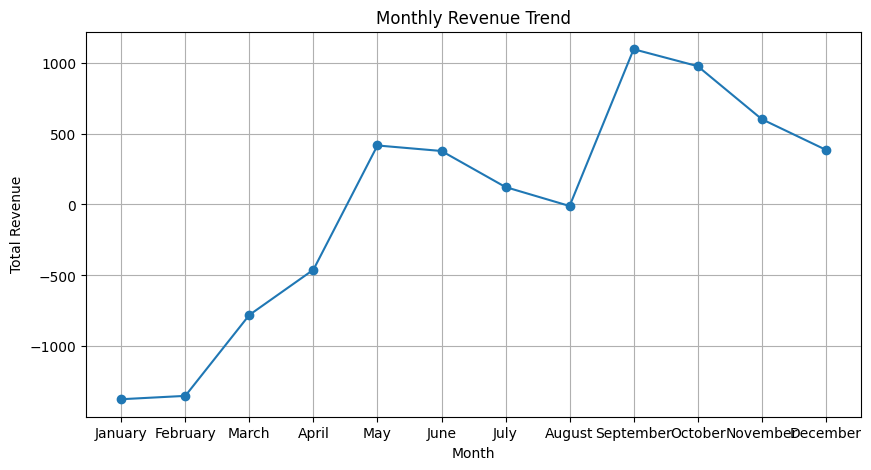

In [224]:
# Analyse the monthly revenue (total_amount) trend

# Extract month from pickup datetime
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Group by month and calculate total revenue
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum()

# Plot the monthly revenue trend
plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.xticks(ticks=range(1, 13), labels=calendar.month_name[1:])
plt.grid(True)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

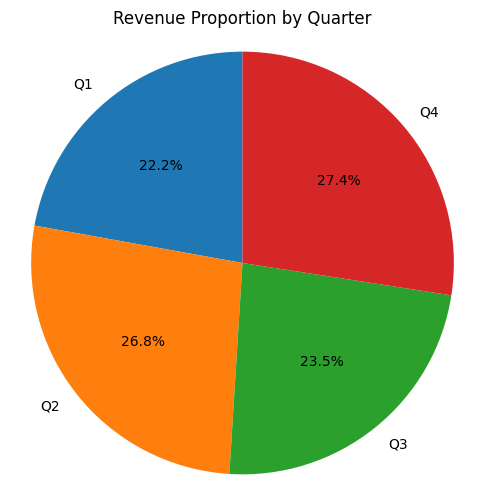

In [227]:
import matplotlib.pyplot as plt

# Ensure pickup datetime is in datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

# Remove rows with non-positive revenue
df_valid = df[df['total_amount'] > 0]

# Extract quarter
df_valid['pickup_quarter'] = df_valid['tpep_pickup_datetime'].dt.quarter

# Calculate total revenue per quarter
quarterly_revenue = df_valid.groupby('pickup_quarter')['total_amount'].sum()

# Calculate proportion
revenue_proportion = quarterly_revenue / quarterly_revenue.sum()

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(revenue_proportion, labels=[f'Q{q}' for q in revenue_proportion.index],
        autopct='%1.1f%%', startangle=90)
plt.title('Revenue Proportion by Quarter')
plt.axis('equal')
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

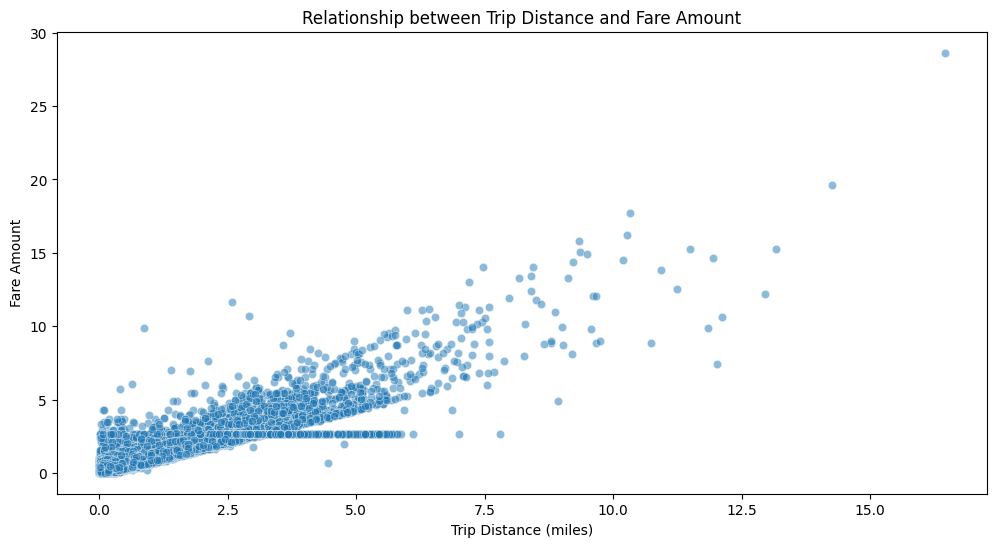

Correlation between Trip Distance and Fare Amount: 0.92


In [230]:
# Show how trip fare is affected by distance
# Filter out trips with trip_distance = 0
filtered_df = non_zero_df[non_zero_df['trip_distance'] > 0]

# Scatter plot function
def render_scatter_plot(x, y, data, title, xlabel, ylabel, figsize=(12, 6)):
    plt.figure(figsize=figsize)
    sns.scatterplot(x=x, y=y, data=data, alpha=0.5)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Plot the relationship
render_scatter_plot(
    'trip_distance', 'fare_amount',
    filtered_df,
    'Relationship between Trip Distance and Fare Amount',
    'Trip Distance (miles)', 'Fare Amount'
)

# Correlation between distance and fare
correlation_value = filtered_df['trip_distance'].corr(filtered_df['fare_amount'])
print(f'Correlation between Trip Distance and Fare Amount: {correlation_value:.2f}')

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

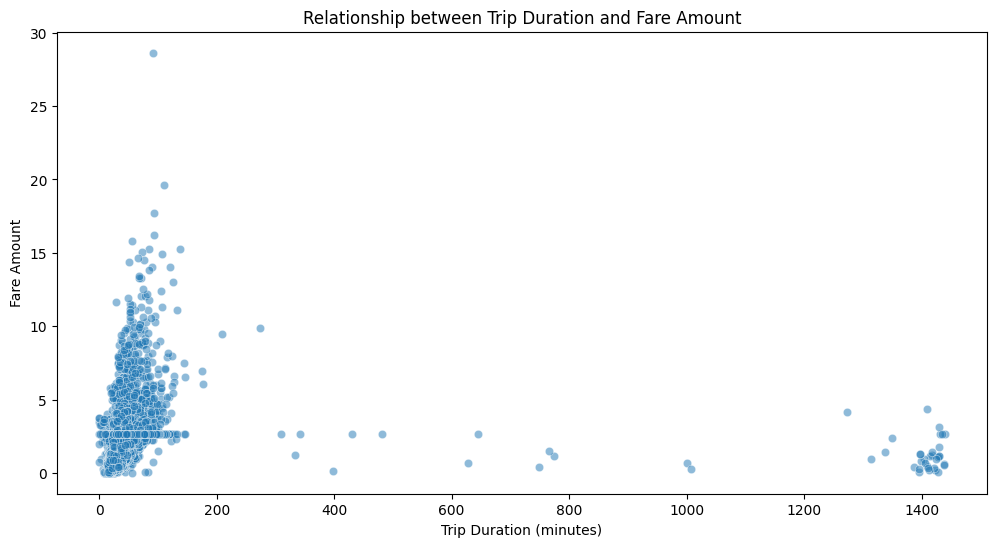

Correlation between Trip Duration and Fare Amount: 0.24


In [233]:
# Show relationship between fare and trip duration (pickup time to dropoff time)

# Step 1: Calculate trip duration in minutes
non_zero_df['trip_duration'] = (non_zero_df['tpep_dropoff_datetime'] - non_zero_df['tpep_pickup_datetime']).dt.total_seconds() / 60

# Step 2: Plot the relationship between trip duration and fare amount
render_scatter_plot('trip_duration', 'fare_amount', non_zero_df, 
                    'Relationship between Trip Duration and Fare Amount', 
                    'Trip Duration (minutes)', 'Fare Amount')

# Step 3: Calculate correlation
correlation_value_duration_fare = non_zero_df['trip_duration'].corr(non_zero_df['fare_amount'])
print(f'Correlation between Trip Duration and Fare Amount: {correlation_value_duration_fare:.2f}')

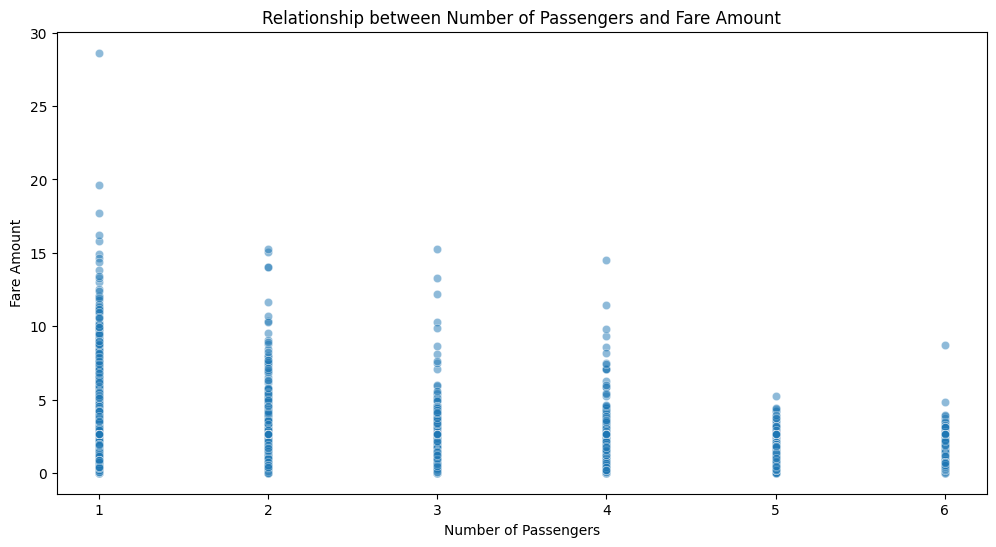

Correlation between Number of Passengers and Fare Amount: 0.05


In [235]:
# Show relationship between fare and number of passengers

# Plot the relationship between fare_amount and passenger_count
render_scatter_plot('passenger_count', 'fare_amount', non_zero_df, 'Relationship between Number of Passengers and Fare Amount', 'Number of Passengers', 'Fare Amount')

# Calculate the correlation value between passenger_count and fare_amount
correlation_value_passenger_fare = non_zero_df['passenger_count'].corr(non_zero_df['fare_amount'])
print(f'Correlation between Number of Passengers and Fare Amount: {correlation_value_passenger_fare:.2f}')

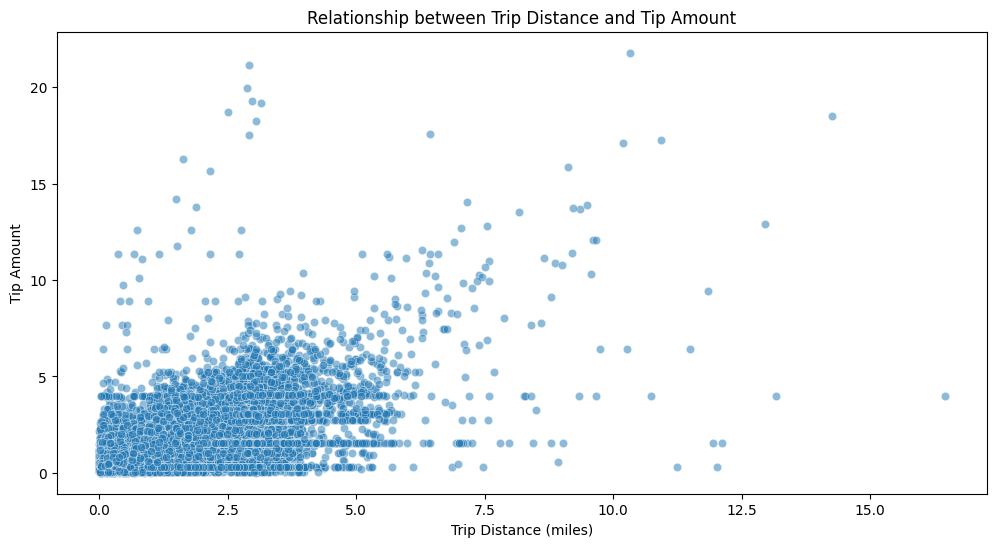

Correlation between Trip Distance and Tip Amount: 0.69


In [236]:
# Show relationship between tip and trip distance

# Plot the relationship between tip_amount and trip_distance
render_scatter_plot('trip_distance', 'tip_amount', non_zero_df, 'Relationship between Trip Distance and Tip Amount', 'Trip Distance (miles)', 'Tip Amount')

# Calculate the correlation value between trip_distance and tip_amount
correlation_value_tip_distance = non_zero_df['trip_distance'].corr(non_zero_df['tip_amount'])
print(f'Correlation between Trip Distance and Tip Amount: {correlation_value_tip_distance:.2f}')


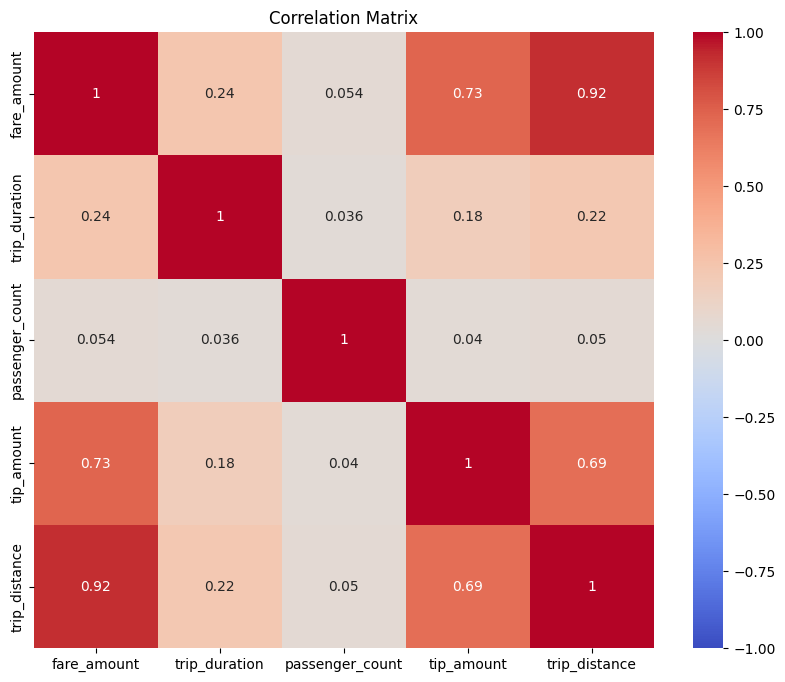

In [239]:
# Select the relevant columns for correlation analysis
correlation_columns = ['fare_amount', 'trip_duration', 'passenger_count', 'tip_amount', 'trip_distance']

# Calculate the correlation matrix
correlation_matrix = non_zero_df[correlation_columns].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

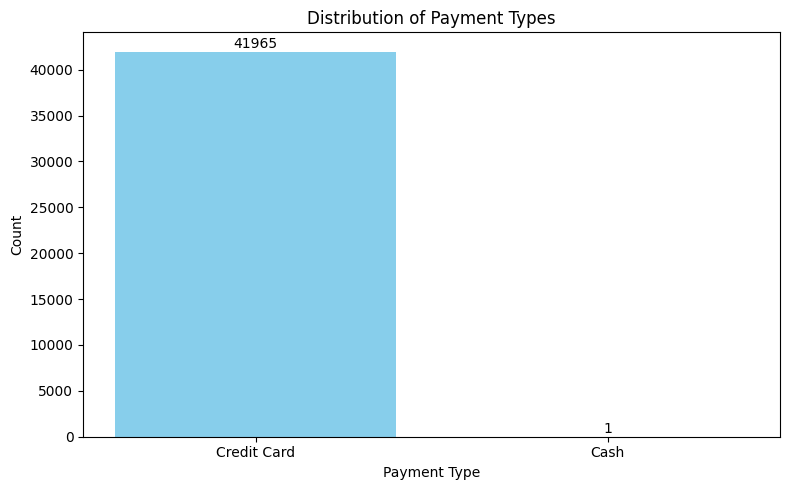

In [242]:
# Analyse the distribution of different payment types (payment_type).
import matplotlib.pyplot as plt

# Get the count of each payment type
payment_type_counts = non_zero_df['payment_type'].value_counts().sort_index()

# Map the payment type codes to their corresponding descriptions
payment_type_map = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'
}

# Replace the payment type codes with descriptions
payment_type_labels = payment_type_counts.index.map(payment_type_map)

# Plot the distribution of payment types using Matplotlib
plt.figure(figsize=(8, 5))
bars = plt.bar(payment_type_labels, payment_type_counts.values, color='skyblue')
plt.title('Distribution of Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Count')

# Add labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 100, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [248]:
#!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [251]:
# import geopandas as gpd
import geopandas as gpd

shapefile_path = "taxi_zones/taxi_zones.shp"
# Read the shapefile using geopandas
zones = gpd.read_file(shapefile_path)

zones.head()


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [254]:
# print(zones.info())
# zones.plot()

In [256]:
print(zones.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


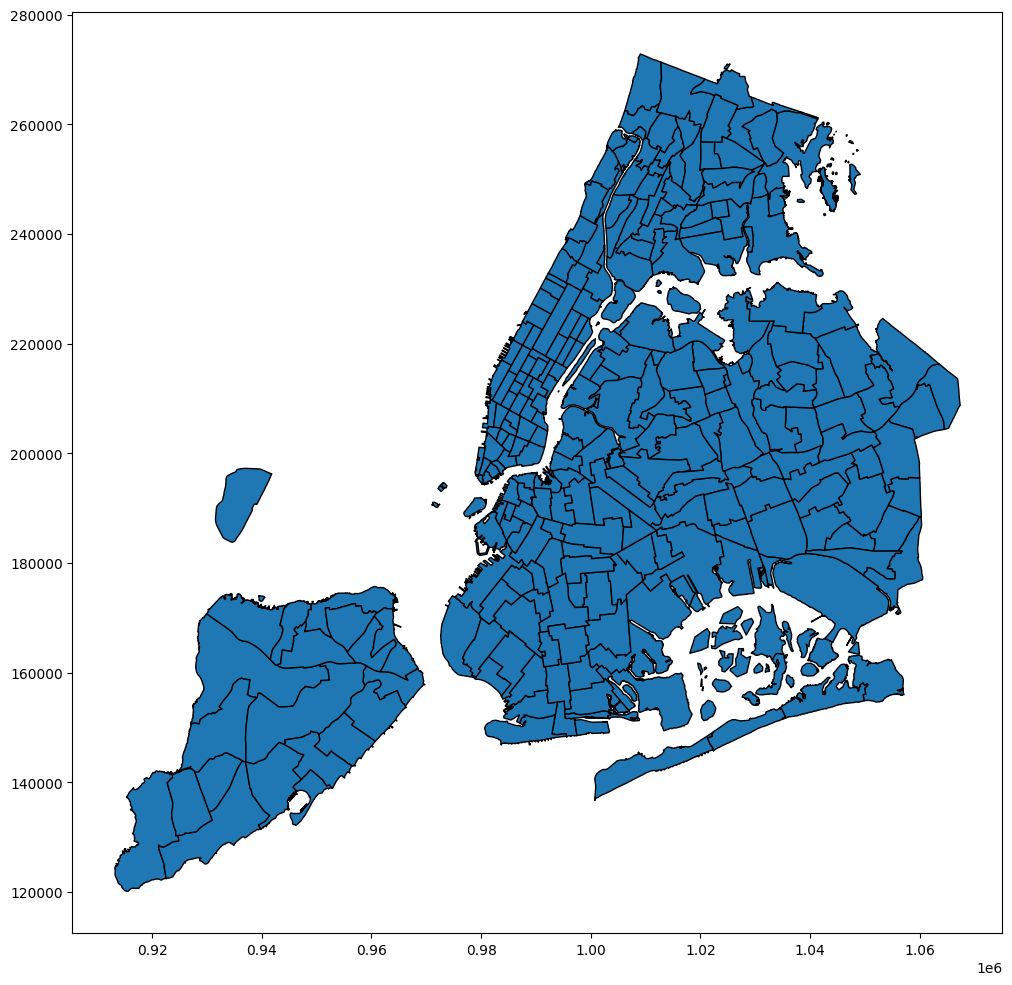

In [258]:
# Plot the taxi zones
zones.plot(figsize=(12, 12), edgecolor='black')
plt.show()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [261]:
# Merge zones and trip records using LocationID and PULocationID
merged_df = non_zero_df.merge(zones, left_on='PULocationID', right_on='LocationID', how='left')

# Display the first few rows of the merged DataFrame
merged_df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,tip_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee_combined,pickup_hour,pickup_dayofweek,pickup_month,trip_duration,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-10 14:04:06,2023-01-10 14:31:02,1.0,0.437154,1.0,239,13,1,0.559311,0.00,0.796717,1.0,0.511074,2.5,0.00,14,1,1,26.933333,239.0,0.063626,0.000205,Upper West Side South,239.0,Manhattan,"POLYGON ((991168.979 226252.992, 991955.565 22..."
1,1,2023-07-11 20:14:23,2023-07-11 20:39:38,4.0,1.602738,1.0,138,48,1,1.400844,10.25,2.245144,1.0,2.050635,2.5,1.75,20,1,7,25.250000,138.0,0.107467,0.000537,LaGuardia Airport,138.0,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
2,2,2023-09-26 04:39:27,2023-09-26 04:55:44,1.0,0.509471,1.0,237,80,1,0.291550,1.00,0.605231,1.0,0.308683,2.5,0.00,4,1,9,16.283333,237.0,0.042213,0.000096,Upper East Side South,237.0,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21..."
3,2,2023-03-14 20:44:50,2023-03-14 21:10:44,1.0,2.791719,2.0,132,107,1,2.690467,0.00,3.033186,1.0,2.928964,2.5,1.25,20,1,3,25.900000,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283..."
4,1,2023-12-13 15:22:41,2023-12-13 16:29:24,1.0,2.815116,2.0,264,107,1,2.690467,2.50,4.049539,1.0,3.070811,2.5,0.00,15,2,12,66.716667,NaN,NaN,NaN,NaN,NaN,NaN,None


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [265]:
# Group data by PULocationID and calculate the number of trips for each location
trips_per_location = merged_df.groupby('PULocationID').size().reset_index(name='total_trips')

# Display the first few rows of the result
trips_per_location.head()

,PULocationID,total_trips
0,4,40
1,7,18
2,8,1
3,10,49
4,12,33


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

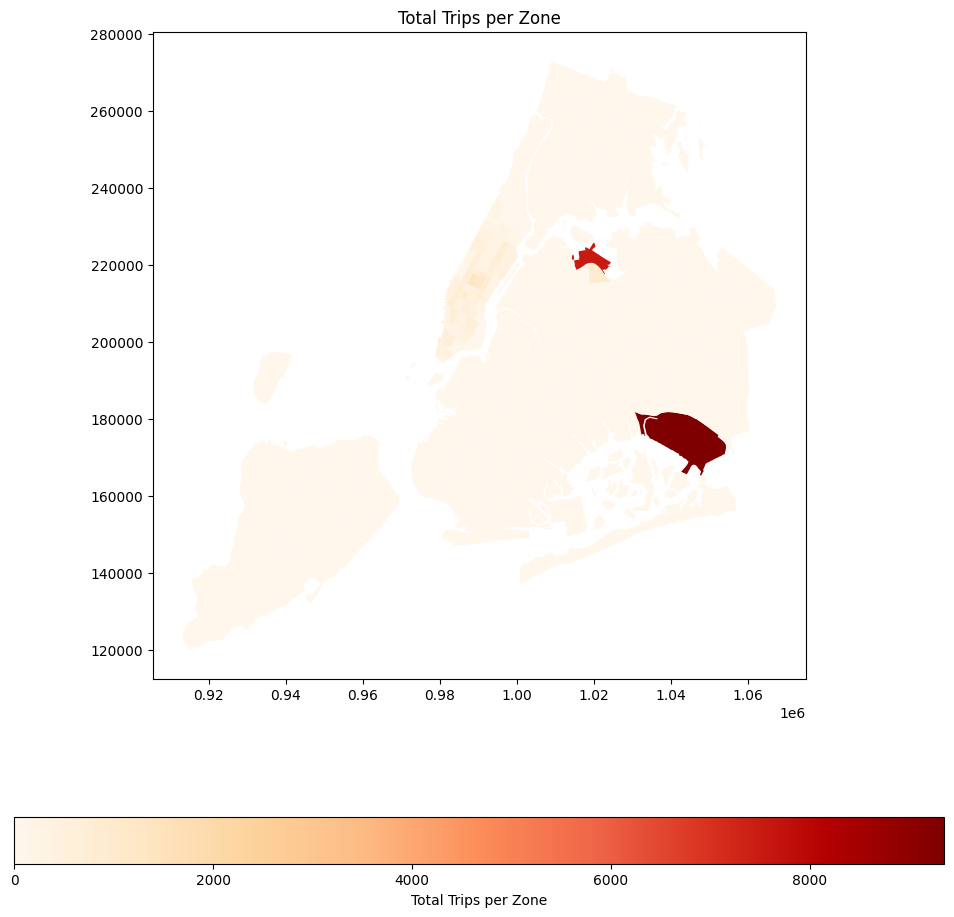

In [268]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = zones.merge(trips_per_location, left_on='LocationID', right_on='PULocationID', how='left')

# Fill NaN values with 0 (for zones with no trips)
zones_with_trips['total_trips'].fillna(0, inplace=True)

# Plot the map of zones showing total trips per zone
zones_with_trips.plot(column='total_trips', cmap='OrRd', legend=True, legend_kwds={'label': "Total Trips per Zone", 'orientation': "horizontal"}, figsize=(12, 12))
plt.title('Total Trips per Zone')
plt.show()

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

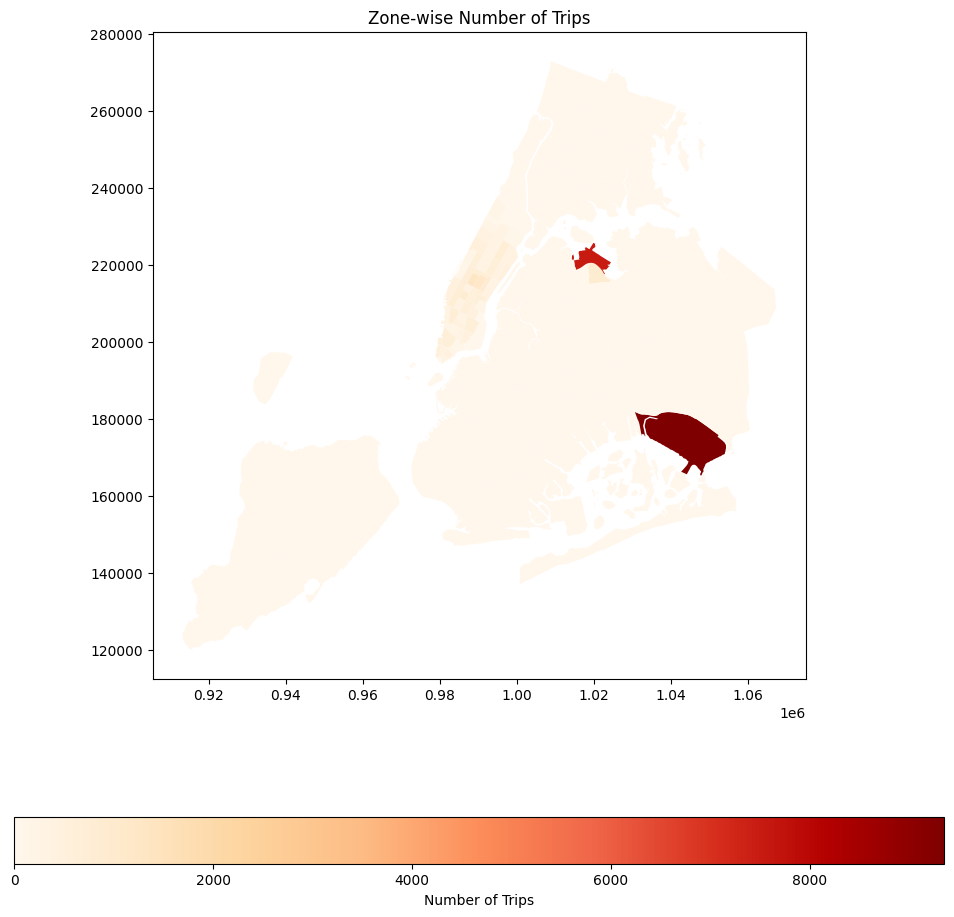

In [273]:
# Define figure and axis
# Aggregate the number of trips per zone using PULocationID
zone_trip_counts = merged_df['PULocationID'].value_counts().reset_index()
zone_trip_counts.columns = ['LocationID', 'trip_count']

# Merge the trip counts with the GeoDataFrame
zones = zones.merge(zone_trip_counts, on='LocationID', how='left')

# Fill NaN values with 0 (if there are zones with no trips)
zones['trip_count'] = zones['trip_count'].fillna(0)

# Define the figure and axis for the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Plot the GeoDataFrame with the trip counts
zones.plot(column='trip_count', ax=ax, legend=True, legend_kwds={'label': "Number of Trips", 'orientation': "horizontal"}, cmap='OrRd')

# Display the plot
plt.title('Zone-wise Number of Trips')
plt.show()

In [274]:
# can you try displaying the zones DF sorted by the number of trips?

# Sort the zones by the number of trips
zones_sorted = zones.sort_values(by='trip_count', ascending=False)

# Display the sorted zones
zones_sorted[['zone', 'trip_count']]

,zone,trip_count
131,JFK Airport,9352.0
137,LaGuardia Airport,7496.0
229,Times Sq/Theatre District,1301.0
160,Midtown Center,1155.0
69,East Elmhurst,902.0
...,...,...
1,Jamaica Bay,0.0
132,Kensington,0.0
134,Kew Gardens Hills,0.0
135,Kingsbridge Heights,0.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [285]:
print(merged_df.columns)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'airport_fee_combined', 'pickup_hour', 'pickup_dayofweek',
       'pickup_month', 'trip_duration', 'OBJECTID', 'Shape_Leng', 'Shape_Area',
       'zone', 'LocationID', 'borough', 'geometry'],
      dtype='object')


In [287]:
# Find routes which have the slowest speeds at different times of the day

# Group by pickup and dropoff locations and hour of the day
grouped = merged_df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])

route_stats = grouped.agg({
    'trip_duration': 'mean',
    'trip_distance': 'mean'
}).reset_index()

route_stats['speed'] = route_stats['trip_distance'] / (route_stats['trip_duration'] / 60)  # speed in mph

slow_routes = route_stats[route_stats['speed'] < 10]

slow_routes.head()

,PULocationID,DOLocationID,pickup_hour,trip_duration,trip_distance,speed
0,4,17,22,31.558333,0.623264,1.184976
1,4,33,0,17.950000,0.194678,0.650735
2,4,41,3,21.683333,0.668994,1.851176
3,4,48,2,17.650000,0.169154,0.575029
4,4,48,17,33.616667,0.060678,0.108301


How does identifying high-traffic, high-demand routes help us?

In [290]:
# Find routes which have the slowest speeds at different times of the day
# Find routes which have the slowest speeds at different times of the day
slow_routes_by_hour = slow_routes.groupby('pickup_hour').apply(lambda x: x.nlargest(1, 'speed')).reset_index(drop=True)
slow_routes_by_hour.head()

,PULocationID,DOLocationID,pickup_hour,trip_duration,trip_distance,speed
0,223,265,0,35.633333,5.656759,9.524945
1,132,153,1,32.483333,5.044189,9.317127
2,132,140,2,24.216667,3.557431,8.814007
3,239,132,3,28.916667,4.742158,9.839636
4,132,265,4,29.375000,4.395461,8.977962


In [292]:
print("Slowest high-traffic routes by hour of the day:")
print(slow_routes_by_hour[['pickup_hour', 'PULocationID', 'DOLocationID', 'speed', 'trip_duration']])

Slowest high-traffic routes by hour of the day:
    pickup_hour  PULocationID  DOLocationID     speed  trip_duration
0             0           223           265  9.524945      35.633333
1             1           132           153  9.317127      32.483333
2             2           132           140  8.814007      24.216667
3             3           239           132  9.839636      28.916667
4             4           132           265  8.977962      29.375000
5             5           132           195  8.387402      35.916667
6             6            13           132  8.558773      36.733333
7             7           158           132  8.383785      42.066667
8             8           100             1  7.388826      24.483333
9             9           132            14  7.634559      30.950000
10           10            13           132  9.590350      32.183333
11           11           132           264  8.250786      46.116667
12           12           246           265  6.851462  

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

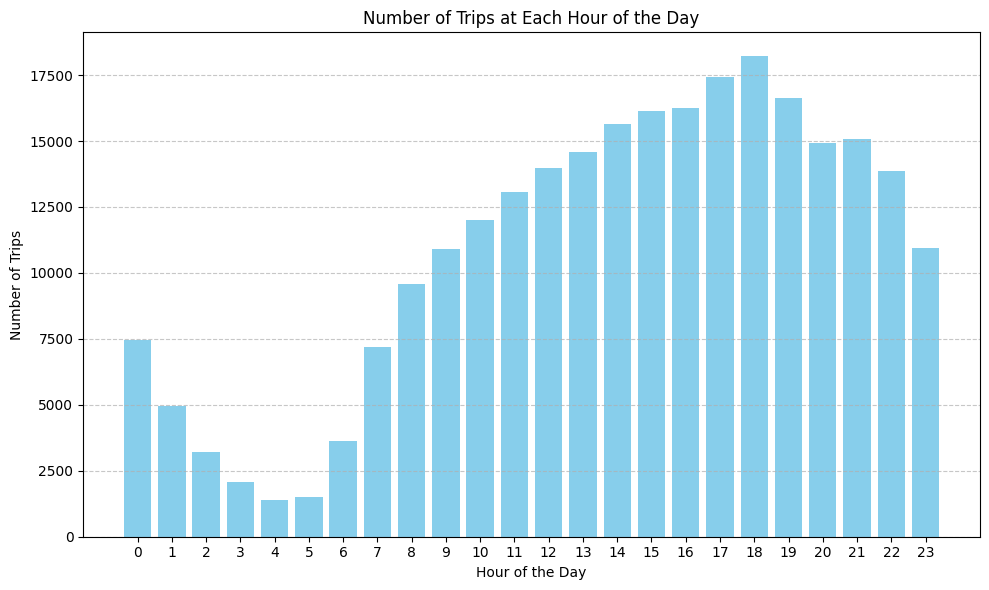

Busiest hour: 18:00 with 18210 trips.


In [299]:
# Visualise the number of trips per hour and find the busiest hour

# Extract pickup hour
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Count trips per hour and sort by hour
hourly_counts = df['pickup_hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(hourly_counts.index, hourly_counts.values, color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Number of Trips at Each Hour of the Day')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Busiest hour
busiest_hour = hourly_counts.idxmax()
trip_count = hourly_counts.max()
print(f'Busiest hour: {busiest_hour}:00 with {trip_count} trips.')


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

In [301]:
sample_ratio = 0.05  # 5% sample

# Scale counts
scaled_counts = hourly_counts / sample_ratio

# Find busiest hour after scaling
busiest_hour_scaled = scaled_counts.idxmax()
trip_count_scaled = scaled_counts.max()

print(f'Estimated actual busiest hour: {busiest_hour_scaled}:00 with {int(trip_count_scaled)} trips.')

Estimated actual busiest hour: 18:00 with 364200 trips.


**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [316]:
# Suppose you sampled 5% of the trips
# Define the correct sampling ratio
sampling_ratio = 0.05  # 5% sample

# Get top 5 busiest hours in sample
busiest_hours = hourly_trip_counts.nlargest(5)

# Scale up to get actual estimated numbers
actual_busiest_hours = busiest_hours / sampling_ratio

# Show results
print("Estimated actual number of trips in the five busiest hours:")
for hour, count in actual_busiest_hours.items():
    print(f"Hour {hour}:00 - Estimated Trips: {int(count)}")

Estimated actual number of trips in the five busiest hours:
Hour 22:00 - Estimated Trips: 54520
Hour 16:00 - Estimated Trips: 52260
Hour 21:00 - Estimated Trips: 52220
Hour 15:00 - Estimated Trips: 52000
Hour 14:00 - Estimated Trips: 51400


In [318]:
print("Top 5 busiest hours from sample:")
print(top5_hours)

print("\nEstimated actual number of trips (scaled by 1 / sampling ratio):")
for hour, trips in top5_hours_actual.items():
    print(f"Hour {hour}:00 - Estimated Trips: {int(trips)}")

Top 5 busiest hours from sample:
pickup_hour
22    2726
16    2613
21    2611
15    2600
14    2570
Name: count, dtype: int64

Estimated actual number of trips (scaled by 1 / sampling ratio):
Hour 22:00 - Estimated Trips: 54520
Hour 16:00 - Estimated Trips: 52260
Hour 21:00 - Estimated Trips: 52220
Hour 15:00 - Estimated Trips: 52000
Hour 14:00 - Estimated Trips: 51400



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

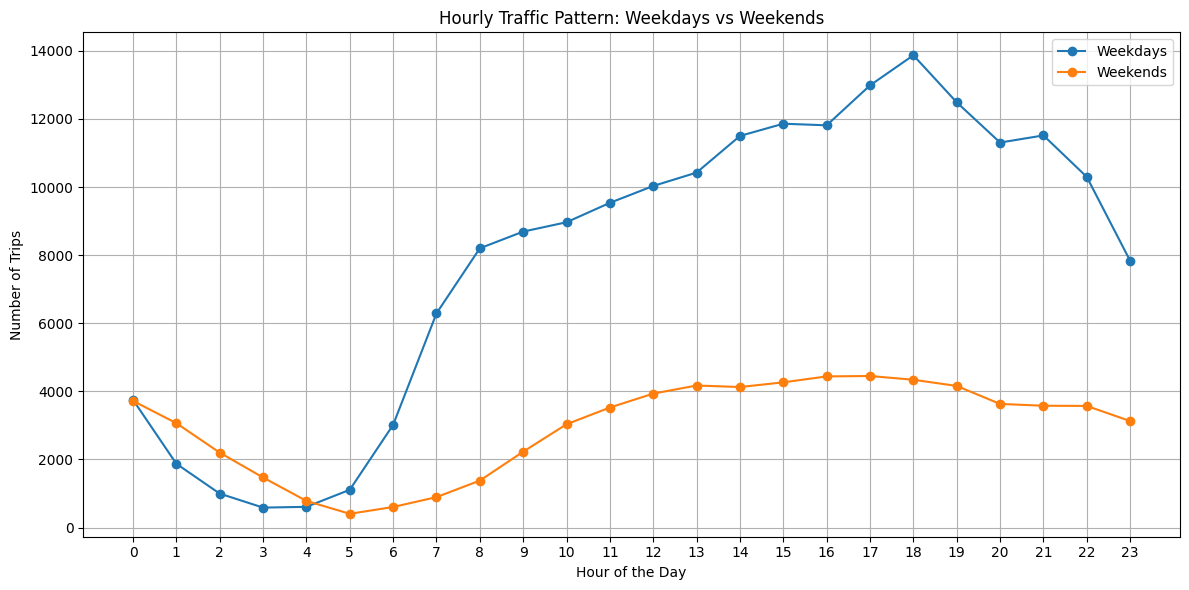

In [328]:
# Compare traffic trends for the week days and weekends

# Extract day of the week and hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['hour'] = df['tpep_pickup_datetime'].dt.hour

# Flag weekend (Saturday=5, Sunday=6)
df['is_weekend'] = df['day_of_week'] >= 5

# Group by weekend/weekday and hour, count number of trips
hourly_counts = df.groupby(['hour', 'is_weekend']).size().unstack(fill_value=0)

# Rename columns for better legend
hourly_counts.columns = ['Weekdays', 'Weekends']

# Plot the hourly traffic patterns with dots (marker='o')
plt.figure(figsize=(12, 6))
plt.plot(hourly_counts.index, hourly_counts['Weekdays'], marker='o', label='Weekdays')
plt.plot(hourly_counts.index, hourly_counts['Weekends'], marker='o', label='Weekends')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.title('Hourly Traffic Pattern: Weekdays vs Weekends')
plt.xticks(range(24))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

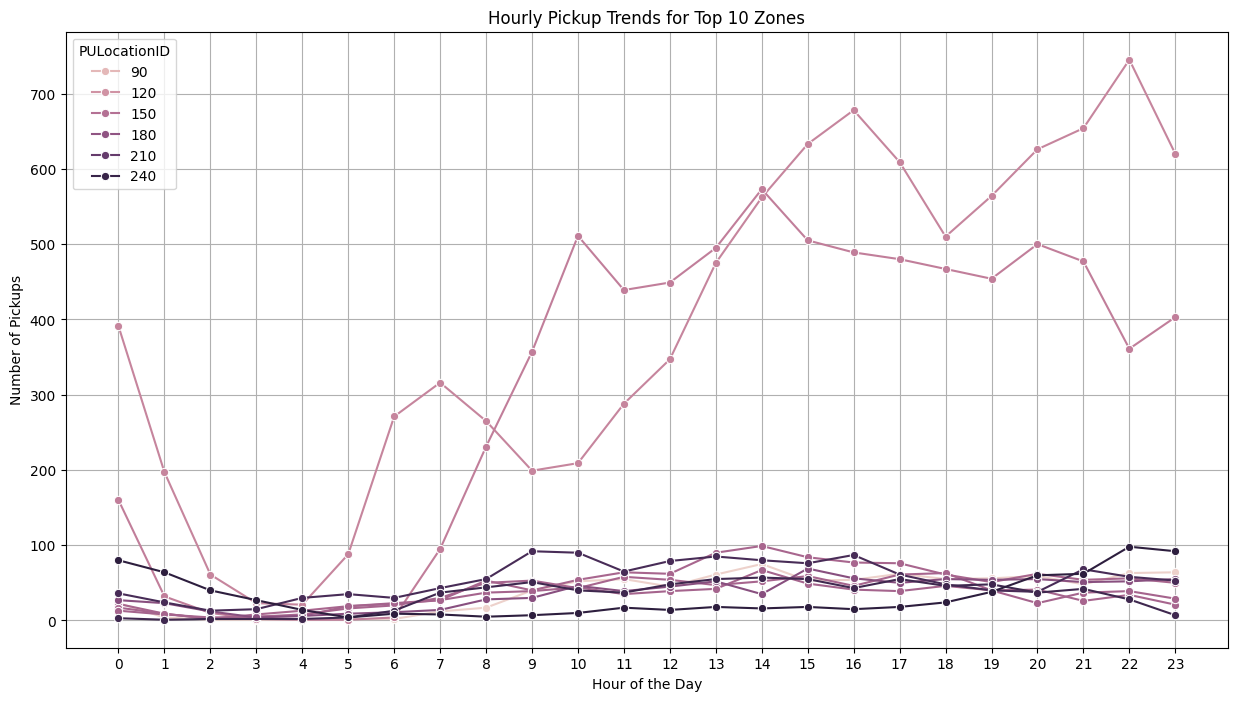

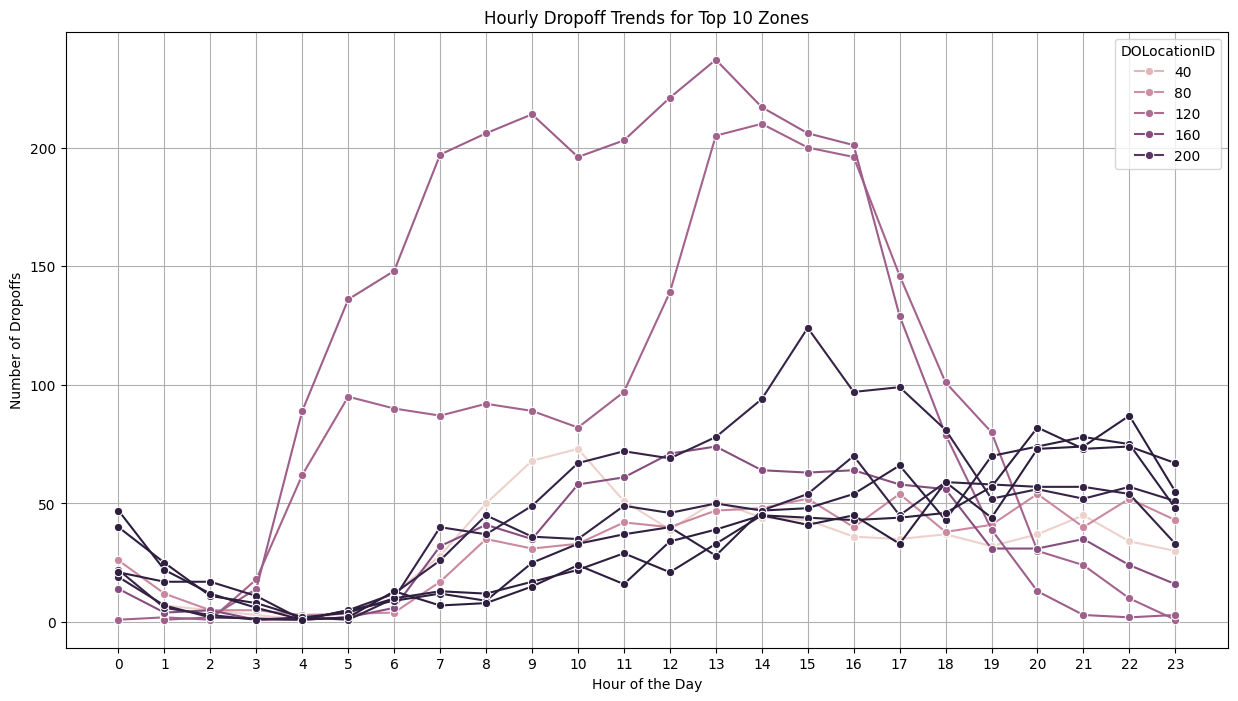

In [332]:
# Find top 10 pickup and dropoff zones
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Create 'pickup_time_derived' (pickup hour)
merged_df['pickup_time_derived'] = merged_df['tpep_pickup_datetime'].dt.hour

# -------------------------------
# TOP 10 PICKUP ZONES PER HOUR
# -------------------------------
pickup_counts = merged_df.groupby(['PULocationID', 'pickup_time_derived']).size().reset_index(name='pickup_count')

# Top 10 pickup zones by total pickups (summed over hours)
top_pickup_zones = pickup_counts.groupby('PULocationID')['pickup_count'].sum().nlargest(10).index

# Filter for only top 10 pickup zones
top_pickup_data = pickup_counts[pickup_counts['PULocationID'].isin(top_pickup_zones)]

# Plot pickup trends
plt.figure(figsize=(15, 8))
sns.lineplot(data=top_pickup_data, x='pickup_time_derived', y='pickup_count', hue='PULocationID', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.title('Hourly Pickup Trends for Top 10 Zones')
plt.xticks(range(24))
plt.grid(True)
plt.legend(title='PULocationID')
plt.show()

# -------------------------------
# TOP 10 DROPOFF ZONES PER HOUR
# -------------------------------
dropoff_counts = merged_df.groupby(['DOLocationID', 'pickup_time_derived']).size().reset_index(name='dropoff_count')

# Top 10 dropoff zones by total dropoffs (summed over hours)
top_dropoff_zones = dropoff_counts.groupby('DOLocationID')['dropoff_count'].sum().nlargest(10).index

# Filter for only top 10 dropoff zones
top_dropoff_data = dropoff_counts[dropoff_counts['DOLocationID'].isin(top_dropoff_zones)]

# Plot dropoff trends
plt.figure(figsize=(15, 8))
sns.lineplot(data=top_dropoff_data, x='pickup_time_derived', y='dropoff_count', hue='DOLocationID', marker='o')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Dropoffs')
plt.title('Hourly Dropoff Trends for Top 10 Zones')
plt.xticks(range(24))
plt.grid(True)
plt.legend(title='DOLocationID')
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [336]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Calculate pickup counts per zone
pickup_counts = merged_df['PULocationID'].value_counts().reset_index()
pickup_counts.columns = ['LocationID', 'pickup_count']

# Calculate dropoff counts per zone
dropoff_counts = merged_df['DOLocationID'].value_counts().reset_index()
dropoff_counts.columns = ['LocationID', 'dropoff_count']

# Merge both counts
pickup_dropoff_counts = pickup_counts.merge(dropoff_counts, on='LocationID', how='outer').fillna(0)

# Avoid division by zero: Replace 0 with np.nan temporarily
import numpy as np
pickup_dropoff_counts['safe_dropoff'] = pickup_dropoff_counts['dropoff_count'].replace(0, np.nan)

# Calculate the ratio safely
pickup_dropoff_counts['pickup_dropoff_ratio'] = pickup_dropoff_counts['pickup_count'] / pickup_dropoff_counts['safe_dropoff']

# Replace NaN (where dropoff was 0) with 0 or another meaningful value
pickup_dropoff_counts['pickup_dropoff_ratio'] = pickup_dropoff_counts['pickup_dropoff_ratio'].replace([np.nan, np.inf], 0)

# Show Top 10 zones with highest ratio
highest_ratios = pickup_dropoff_counts.nlargest(10, 'pickup_dropoff_ratio')
print("🔼 10 Highest Pickup/Dropoff Ratios:")
print(highest_ratios[['LocationID', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

# Show Bottom 10 zones with lowest ratio (excluding zones where both counts are 0)
non_zero = pickup_dropoff_counts[(pickup_dropoff_counts['pickup_count'] > 0) | (pickup_dropoff_counts['dropoff_count'] > 0)]
lowest_ratios = non_zero.nsmallest(10, 'pickup_dropoff_ratio')
print("\n🔽 10 Lowest Pickup/Dropoff Ratios:")
print(lowest_ratios[['LocationID', 'pickup_count', 'dropoff_count', 'pickup_dropoff_ratio']])

🔼 10 Highest Pickup/Dropoff Ratios:
     LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
66           70         902.0           50.0             18.040000
124         132        9352.0         2058.0              4.544218
130         138        7496.0         2756.0              2.719884
177         186         878.0          365.0              2.405479
239         249         758.0          332.0              2.283133
7            10          49.0           25.0              1.960000
106         114         445.0          237.0              1.877637
205         215          18.0           10.0              1.800000
224         234         617.0          378.0              1.632275
40           43         323.0          230.0              1.404348

🔽 10 Lowest Pickup/Dropoff Ratios:
    LocationID  pickup_count  dropoff_count  pickup_dropoff_ratio
0            1           0.0          606.0                   0.0
1            3           0.0            3.0                

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

<Figure size 1200x500 with 0 Axes>

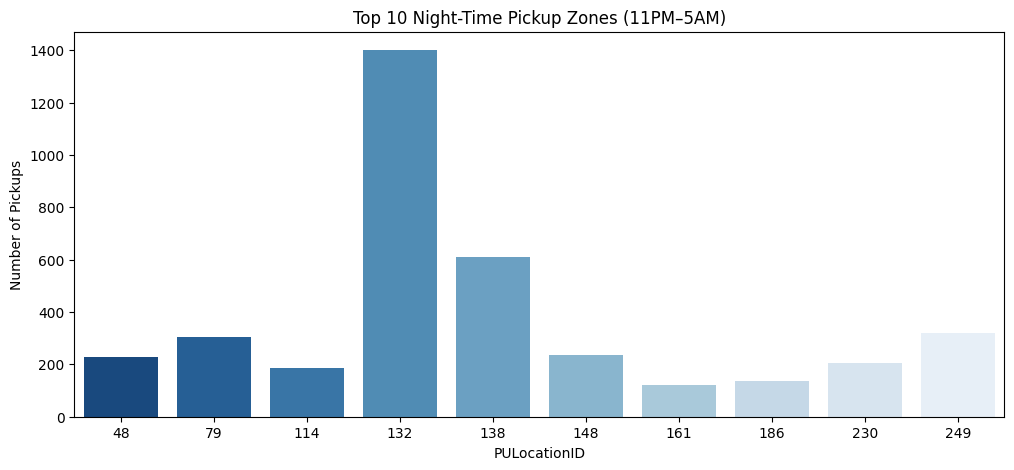

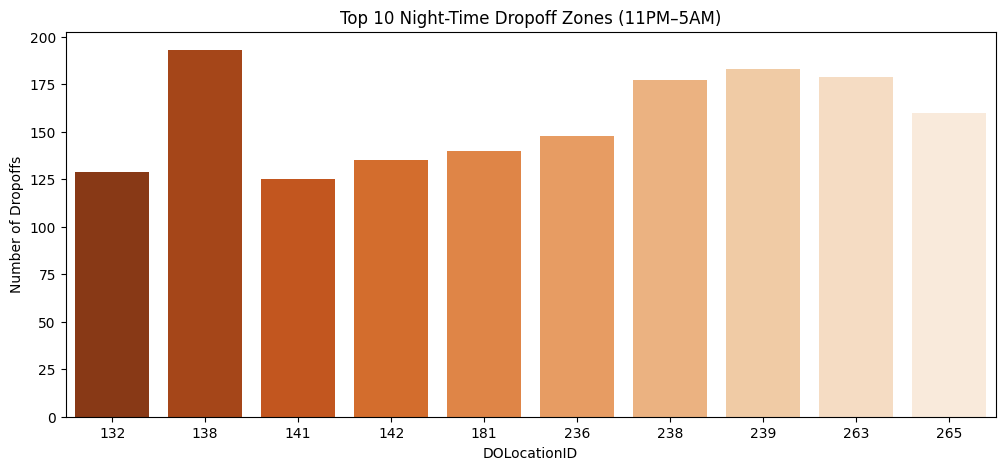

In [340]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones

# Step 1: Extract hour from pickup and dropoff datetime
merged_df['pickup_hour'] = merged_df['tpep_pickup_datetime'].dt.hour
merged_df['dropoff_hour'] = merged_df['tpep_dropoff_datetime'].dt.hour

# Step 2: Define night hours (11 PM to 5 AM)
night_hours = list(range(0, 6)) + [23]  # 0–5 AM and 11 PM

# Step 3: Filter night-time pickups and dropoffs
night_pickups = merged_df[merged_df['pickup_hour'].isin(night_hours)]
night_dropoffs = merged_df[merged_df['dropoff_hour'].isin(night_hours)]

# Step 4: Find top 10 pickup zones at night
top_night_pickup_zones = night_pickups['PULocationID'].value_counts().nlargest(10)

# Step 5: Find top 10 dropoff zones at night
top_night_dropoff_zones = night_dropoffs['DOLocationID'].value_counts().nlargest(10)

# Step 6: Plot Top Pickup Zones
plt.figure(figsize=(12, 5))
sns.barplot(x=top_night_pickup_zones.index, y=top_night_pickup_zones.values, palette='Blues_r')
plt.title("Top 10 Night-Time Pickup Zones (11PM–5AM)")
plt.xlabel("PULocationID")
plt.ylabel("Number of Pickups")
plt.show()

# Step 7: Plot Top Dropoff Zones
plt.figure(figsize=(12, 5))
sns.barplot(x=top_night_dropoff_zones.index, y=top_night_dropoff_zones.values, palette='Oranges_r')
plt.title("Top 10 Night-Time Dropoff Zones (11PM–5AM)")
plt.xlabel("DOLocationID")
plt.ylabel("Number of Dropoffs")
plt.show()


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

Revenue Share by Time of Day (%):
time_of_day
Day      87.45
Night    12.55
Name: fare_amount, dtype: float64


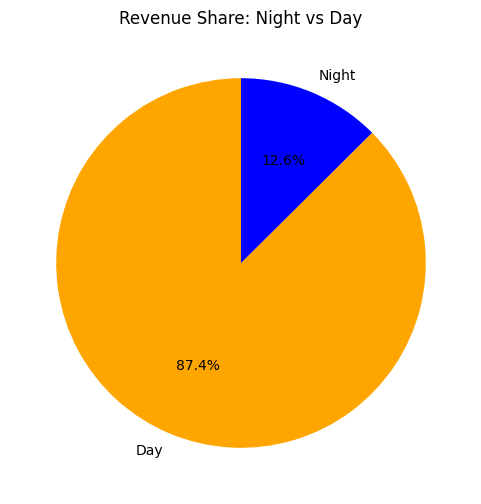

In [342]:
# Filter for night hours (11 PM to 5 AM)
# Step 1: Extract pickup hour
merged_df['pickup_hour'] = merged_df['tpep_pickup_datetime'].dt.hour

# Step 2: Define night hours (11 PM to 5 AM)
night_hours = list(range(0, 6)) + [23]

# Step 3: Create a column indicating time of day
merged_df['time_of_day'] = merged_df['pickup_hour'].apply(lambda x: 'Night' if x in night_hours else 'Day')

# Step 4: Group by time_of_day and sum fare_amount
revenue_by_time = merged_df.groupby('time_of_day')['fare_amount'].sum()

# Step 5: Calculate total revenue
total_revenue = revenue_by_time.sum()

# Step 6: Calculate revenue share
revenue_share = (revenue_by_time / total_revenue) * 100

# Step 7: Display the result
print("Revenue Share by Time of Day (%):")
print(revenue_share.round(2))

# Optional: Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(revenue_share, labels=revenue_share.index, autopct='%1.1f%%', colors=['orange', 'blue'], startangle=90)
plt.title('Revenue Share: Night vs Day')
plt.show()

##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

Average Fare per Mile per Passenger for each Passenger Count:
   Passenger Count  Avg Fare per Mile per Passenger
0              1.0                             2.08
1              2.0                             0.86
2              3.0                             0.60
3              4.0                             0.56
4              5.0                             0.34
5              6.0                             0.45


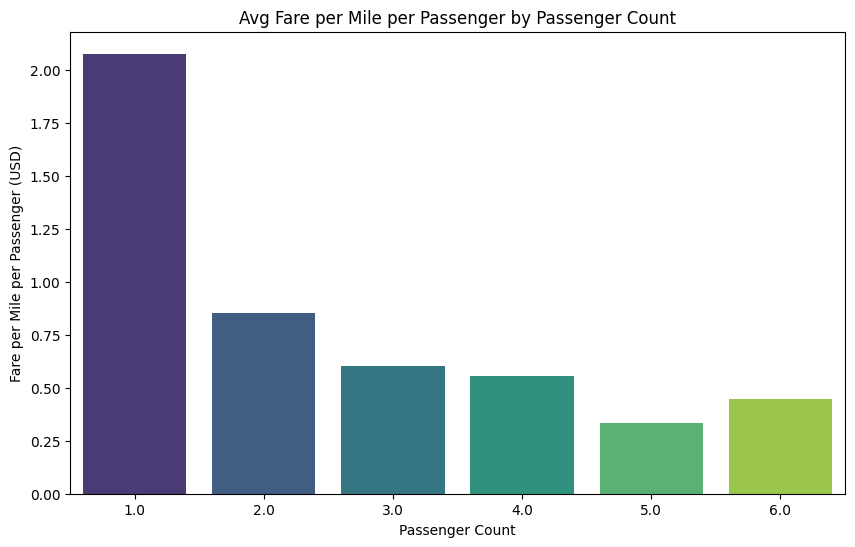

In [344]:
# Analyse the fare per mile per passenger for different passenger counts
# Filter out rows with zero or invalid values (to avoid division errors)
valid_df = merged_df[(merged_df['trip_distance'] > 0) & 
                     (merged_df['fare_amount'] > 0) & 
                     (merged_df['passenger_count'] > 0)]

# Step 1: Compute fare per mile
valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']

# Step 2: Compute fare per mile per passenger
valid_df['fare_per_mile_per_passenger'] = valid_df['fare_per_mile'] / valid_df['passenger_count']

# Step 3: Group by passenger_count and calculate average
fare_analysis = valid_df.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()

# Step 4: Rename columns for clarity
fare_analysis.columns = ['Passenger Count', 'Avg Fare per Mile per Passenger']

# Step 5: Display the result
print("Average Fare per Mile per Passenger for each Passenger Count:")
print(fare_analysis.round(2))

# Optional: Bar plot
plt.figure(figsize=(10,6))
sns.barplot(data=fare_analysis, x='Passenger Count', y='Avg Fare per Mile per Passenger', palette='viridis')
plt.title('Avg Fare per Mile per Passenger by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare per Mile per Passenger (USD)')
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

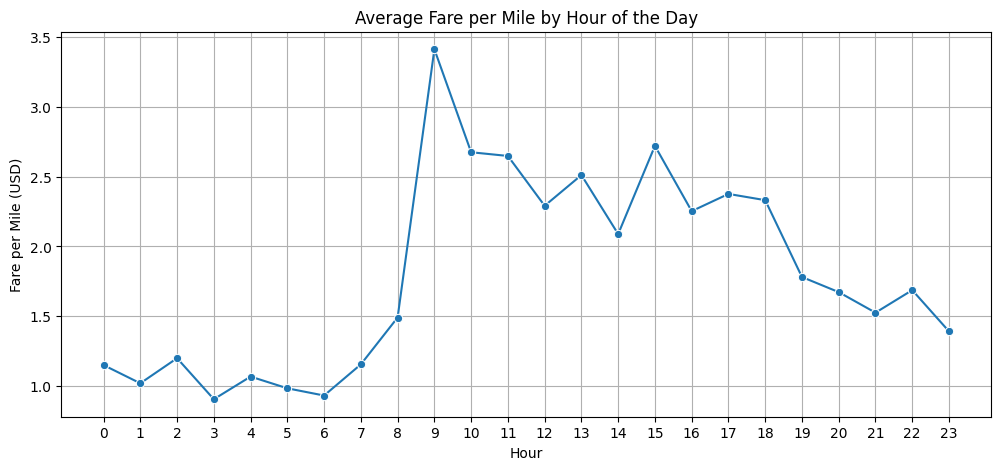

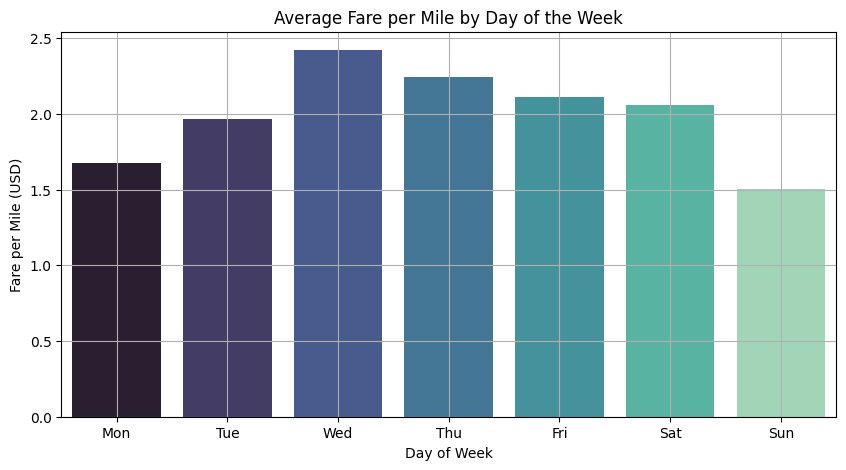

In [347]:
# Compare the average fare per mile for different days and for different times of the day
# Filter out rows with valid fare and trip distance
valid_df = merged_df[(merged_df['trip_distance'] > 0) & 
                     (merged_df['fare_amount'] > 0)]

# Add hour and day of week columns if not already present
valid_df['hour'] = valid_df['tpep_pickup_datetime'].dt.hour
valid_df['day_of_week'] = valid_df['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# Compute fare per mile
valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']

# --- Average fare per mile by hour ---
fare_by_hour = valid_df.groupby('hour')['fare_per_mile'].mean().reset_index()

# --- Average fare per mile by day of the week ---
fare_by_day = valid_df.groupby('day_of_week')['fare_per_mile'].mean().reset_index()

# Optional: Map day numbers to names
day_names = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
fare_by_day['day_of_week'] = fare_by_day['day_of_week'].map(day_names)

# Plot: Average Fare per Mile by Hour
plt.figure(figsize=(12, 5))
sns.lineplot(data=fare_by_hour, x='hour', y='fare_per_mile', marker='o')
plt.title('Average Fare per Mile by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Fare per Mile (USD)')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# Plot: Average Fare per Mile by Day of the Week
plt.figure(figsize=(10, 5))
sns.barplot(data=fare_by_day, x='day_of_week', y='fare_per_mile', palette='mako')
plt.title('Average Fare per Mile by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Fare per Mile (USD)')
plt.grid(True)
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

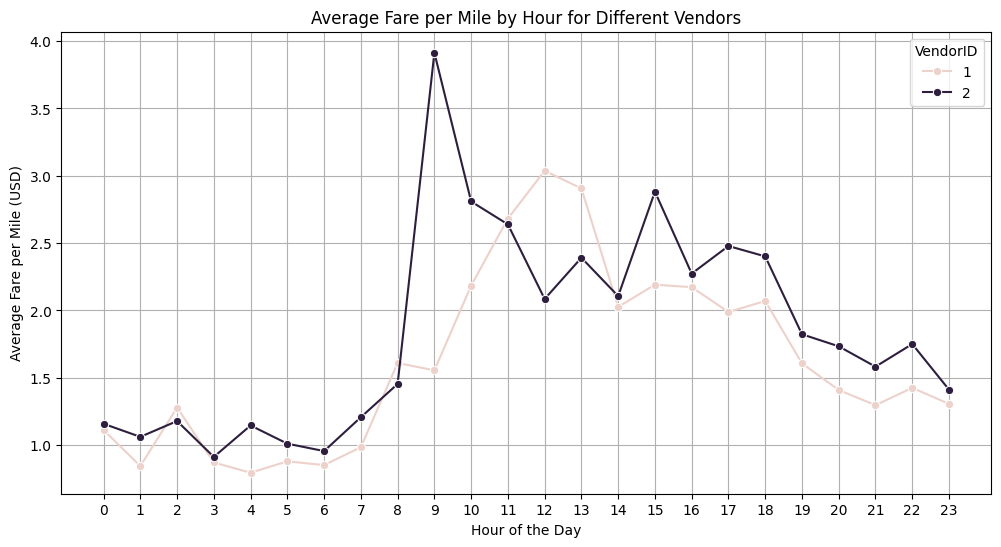

In [349]:
# Compare fare per mile for different vendors

# Filter valid data: avoid divide-by-zero errors
valid_df = merged_df[(merged_df['fare_amount'] > 0) & 
                     (merged_df['trip_distance'] > 0)]

# Extract hour if not already extracted
valid_df['hour'] = valid_df['tpep_pickup_datetime'].dt.hour

# Calculate fare per mile
valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']

# Group by VendorID and hour, then calculate average fare per mile
vendor_hour_fare = valid_df.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=vendor_hour_fare, x='hour', y='fare_per_mile', hue='VendorID', marker='o')
plt.title('Average Fare per Mile by Hour for Different Vendors')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Fare per Mile (USD)')
plt.xticks(range(24))
plt.legend(title='VendorID')
plt.grid(True)
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


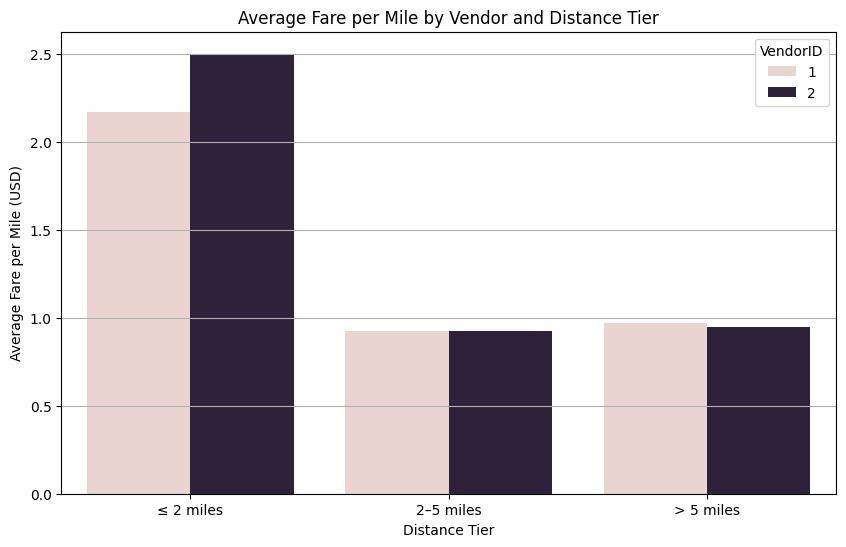

In [351]:
# Defining distance tiers
# Filter for valid trips
valid_df = merged_df[(merged_df['fare_amount'] > 0) & (merged_df['trip_distance'] > 0)]

# Calculate fare per mile
valid_df['fare_per_mile'] = valid_df['fare_amount'] / valid_df['trip_distance']

# Define distance tiers
def assign_tier(dist):
    if dist <= 2:
        return '≤ 2 miles'
    elif dist <= 5:
        return '2–5 miles'
    else:
        return '> 5 miles'

valid_df['distance_tier'] = valid_df['trip_distance'].apply(assign_tier)

# Group by VendorID and distance tier and calculate average fare per mile
tiered_fare = valid_df.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()

# Sort tiers for display order
tier_order = ['≤ 2 miles', '2–5 miles', '> 5 miles']
tiered_fare['distance_tier'] = pd.Categorical(tiered_fare['distance_tier'], categories=tier_order, ordered=True)
tiered_fare = tiered_fare.sort_values(['VendorID', 'distance_tier'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=tiered_fare, x='distance_tier', y='fare_per_mile', hue='VendorID')
plt.title('Average Fare per Mile by Vendor and Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Average Fare per Mile (USD)')
plt.grid(True, axis='y')
plt.legend(title='VendorID')
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

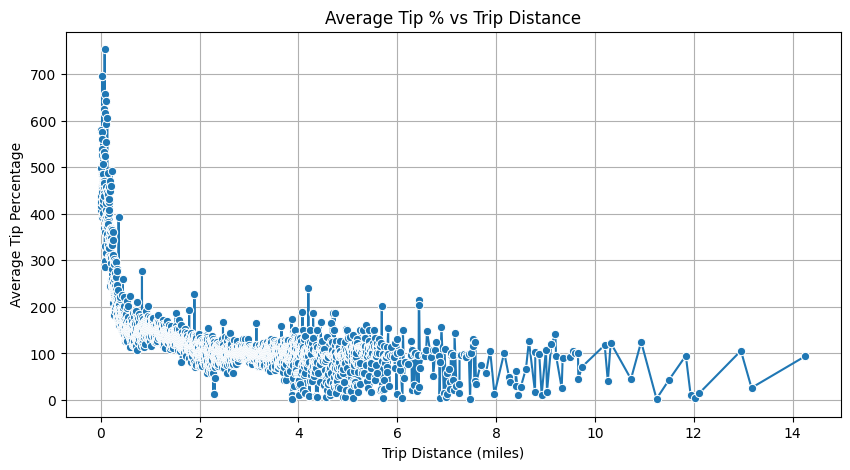

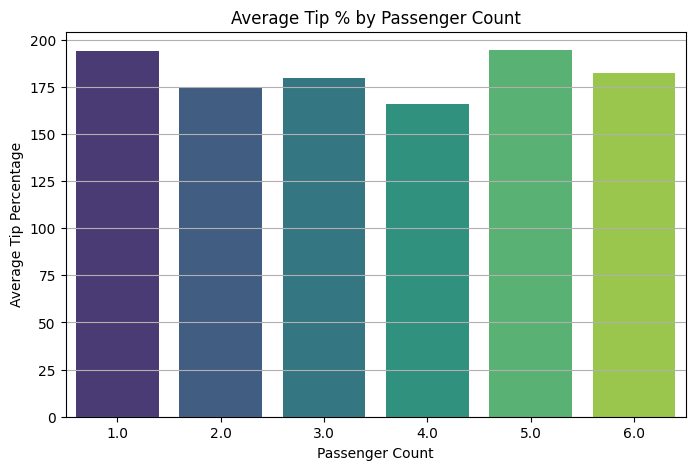

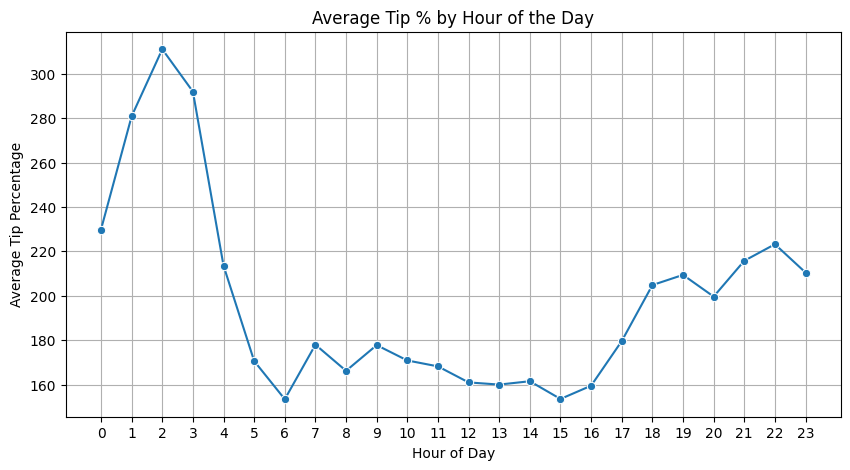

In [357]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Step 1: Calculate tip percentage
merged_df = merged_df[merged_df['fare_amount'] > 0]  # Avoid division by zero
merged_df['tip_percentage'] = (merged_df['tip_amount'] / merged_df['fare_amount']) * 100

# Step 2: Group by trip distance
avg_tip_by_distance = merged_df.groupby('trip_distance')['tip_percentage'].mean().reset_index()

# Limit extreme distances for better visuals
avg_tip_by_distance = avg_tip_by_distance[avg_tip_by_distance['trip_distance'] <= 15]

# Step 3: Group by passenger count
avg_tip_by_passenger = merged_df.groupby('passenger_count')['tip_percentage'].mean().reset_index()

# Step 4: Group by pickup hour
avg_tip_by_hour = merged_df.groupby('pickup_time_derived')['tip_percentage'].mean().reset_index()

# Step 5: Plot average tip % by trip distance
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_tip_by_distance, x='trip_distance', y='tip_percentage', marker='o')
plt.title('Average Tip % vs Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Average Tip Percentage')
plt.grid(True)
plt.show()

# Step 6: Plot average tip % by passenger count
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_tip_by_passenger, x='passenger_count', y='tip_percentage', palette='viridis')
plt.title('Average Tip % by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Average Tip Percentage')
plt.grid(True, axis='y')
plt.show()

# Step 7: Plot average tip % by pickup hour
plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_tip_by_hour, x='pickup_time_derived', y='tip_percentage', marker='o')
plt.title('Average Tip % by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Tip Percentage')
plt.xticks(range(24))
plt.grid(True)
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

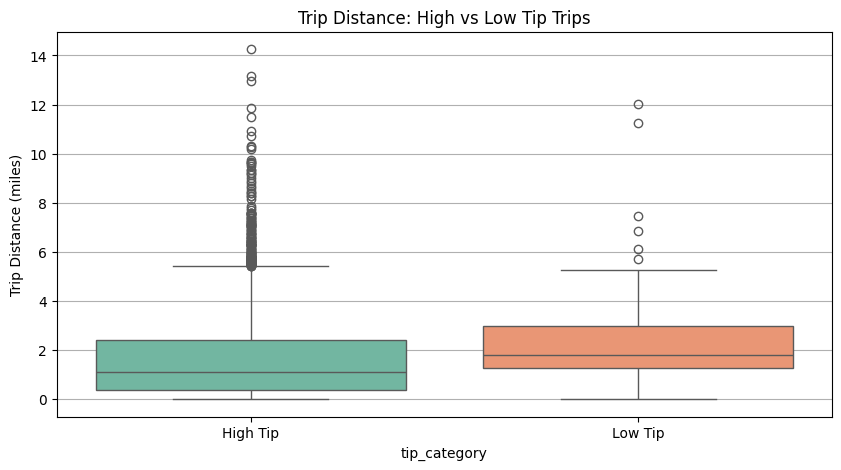

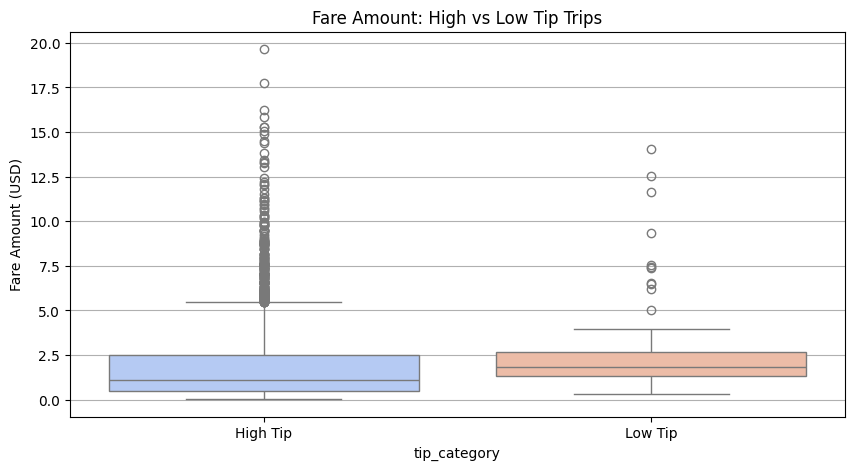

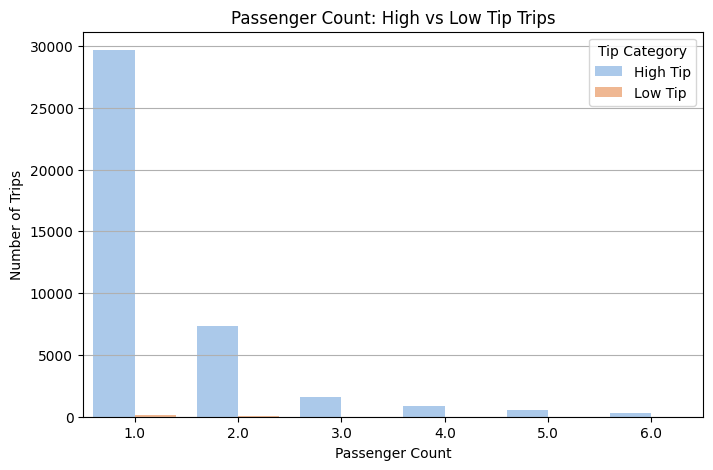

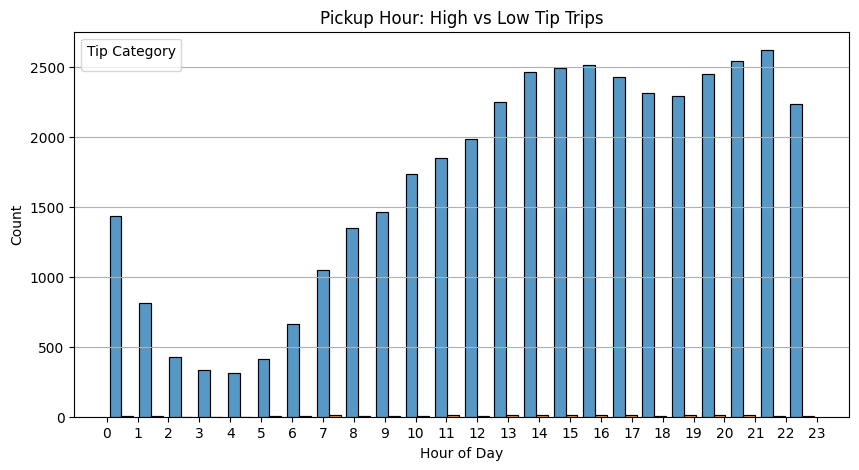

In [359]:
# Only use rows with fare_amount > 0 to prevent invalid tip %
merged_df = merged_df[merged_df['fare_amount'] > 0].copy()
merged_df['tip_percentage'] = (merged_df['tip_amount'] / merged_df['fare_amount']) * 100

# Categorize trips into 'Low Tip' and 'High Tip'
merged_df['tip_category'] = merged_df['tip_percentage'].apply(
    lambda x: 'High Tip' if x > 20 else ('Low Tip' if x < 5 else 'Mid')
)

# Filter only low and high tip categories
tip_df = merged_df[merged_df['tip_category'].isin(['Low Tip', 'High Tip'])]

# 1. Compare trip distance
plt.figure(figsize=(10, 5))
sns.boxplot(data=tip_df, x='tip_category', y='trip_distance', palette='Set2')
plt.title('Trip Distance: High vs Low Tip Trips')
plt.ylabel('Trip Distance (miles)')
plt.grid(True, axis='y')
plt.show()

# 2. Compare fare amount
plt.figure(figsize=(10, 5))
sns.boxplot(data=tip_df, x='tip_category', y='fare_amount', palette='coolwarm')
plt.title('Fare Amount: High vs Low Tip Trips')
plt.ylabel('Fare Amount (USD)')
plt.grid(True, axis='y')
plt.show()

# 3. Compare passenger count
plt.figure(figsize=(8, 5))
sns.countplot(data=tip_df, x='passenger_count', hue='tip_category', palette='pastel')
plt.title('Passenger Count: High vs Low Tip Trips')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Trips')
plt.grid(True, axis='y')
plt.legend(title='Tip Category')
plt.show()

# 4. Compare pickup hour
plt.figure(figsize=(10, 5))
sns.histplot(data=tip_df, x='pickup_time_derived', hue='tip_category', multiple='dodge', bins=24, shrink=0.8)
plt.title('Pickup Hour: High vs Low Tip Trips')
plt.xlabel('Hour of Day')
plt.xticks(range(24))
plt.grid(True, axis='y')
plt.legend(title='Tip Category')
plt.show()

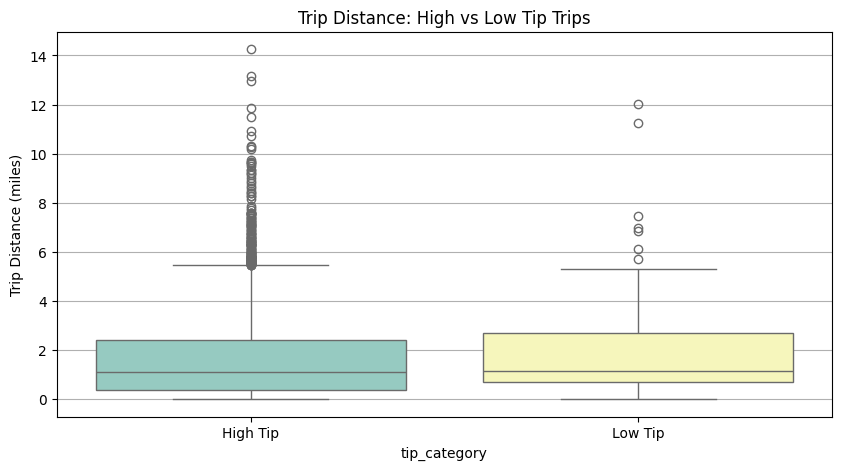

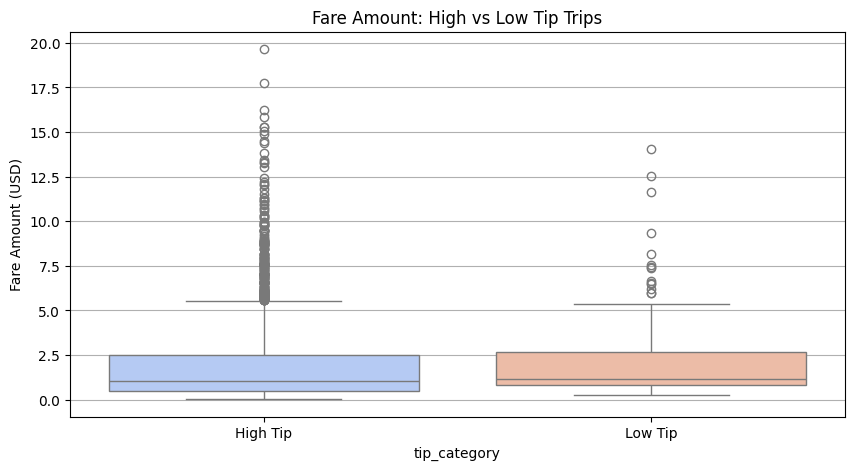

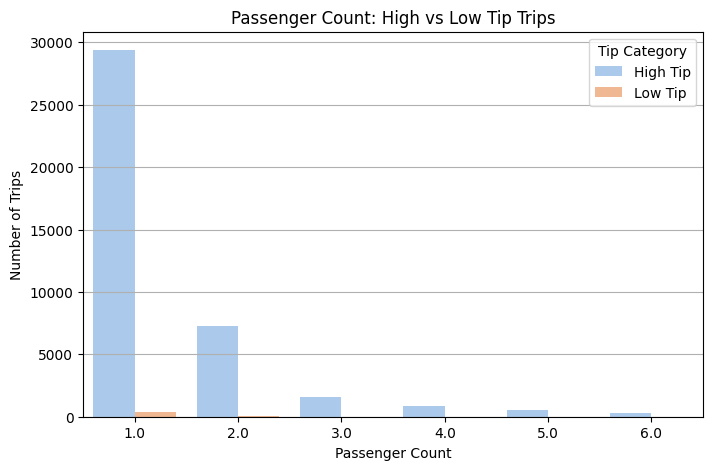

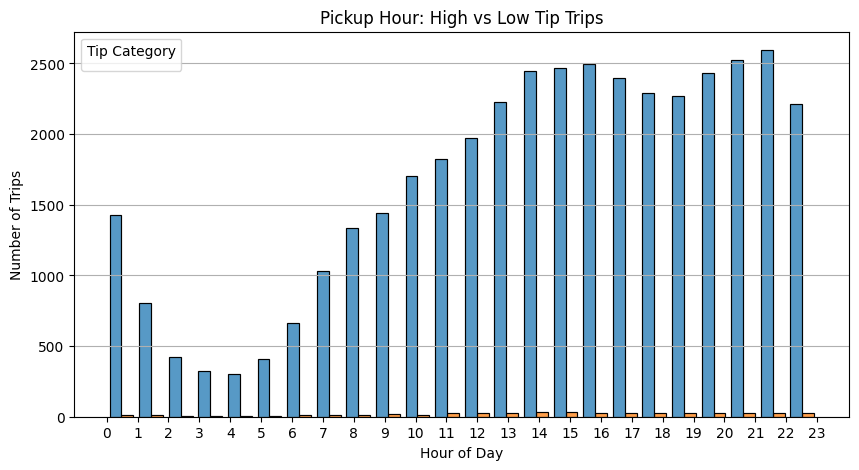

In [361]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
# Filter out invalid fare_amounts
valid_tips_df = merged_df[merged_df['fare_amount'] > 0].copy()

# Calculate tip percentage
valid_tips_df['tip_percentage'] = (valid_tips_df['tip_amount'] / valid_tips_df['fare_amount']) * 100

# Classify trips as Low Tip (<10%) and High Tip (>25%)
valid_tips_df['tip_category'] = valid_tips_df['tip_percentage'].apply(
    lambda x: 'High Tip' if x > 25 else ('Low Tip' if x < 10 else 'Mid')
)

# Keep only Low Tip and High Tip categories
tip_df = valid_tips_df[valid_tips_df['tip_category'].isin(['Low Tip', 'High Tip'])]

# 1. Trip Distance Comparison
plt.figure(figsize=(10, 5))
sns.boxplot(data=tip_df, x='tip_category', y='trip_distance', palette='Set3')
plt.title('Trip Distance: High vs Low Tip Trips')
plt.ylabel('Trip Distance (miles)')
plt.grid(True, axis='y')
plt.show()

# 2. Fare Amount Comparison
plt.figure(figsize=(10, 5))
sns.boxplot(data=tip_df, x='tip_category', y='fare_amount', palette='coolwarm')
plt.title('Fare Amount: High vs Low Tip Trips')
plt.ylabel('Fare Amount (USD)')
plt.grid(True, axis='y')
plt.show()

# 3. Passenger Count Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=tip_df, x='passenger_count', hue='tip_category', palette='pastel')
plt.title('Passenger Count: High vs Low Tip Trips')
plt.xlabel('Passenger Count')
plt.ylabel('Number of Trips')
plt.legend(title='Tip Category')
plt.grid(True, axis='y')
plt.show()

# 4. Hour of the Day
plt.figure(figsize=(10, 5))
sns.histplot(data=tip_df, x='pickup_time_derived', hue='tip_category', multiple='dodge', bins=24, shrink=0.8)
plt.title('Pickup Hour: High vs Low Tip Trips')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(range(24))
plt.grid(True, axis='y')
plt.legend(title='Tip Category')
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

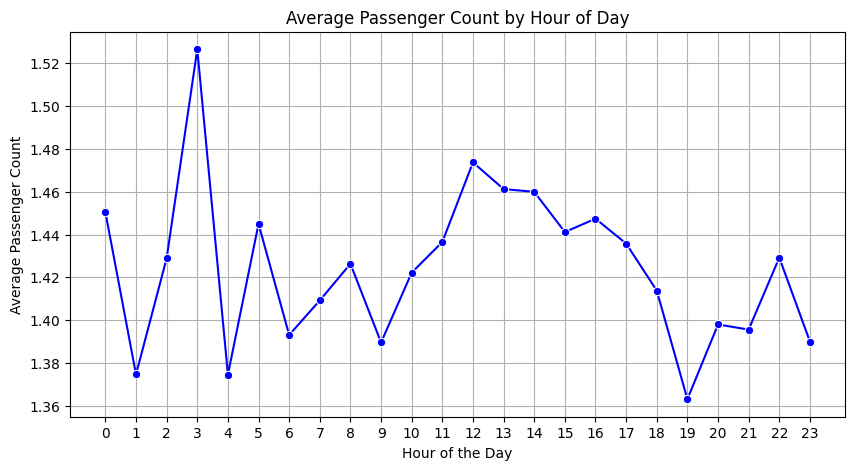

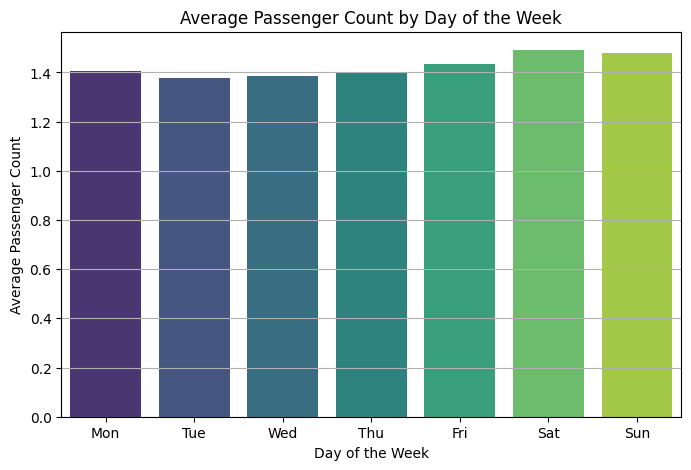

In [363]:
# See how passenger count varies across hours and days
# Ensure pickup_time_derived and pickup_day_derived columns exist
merged_df['pickup_hour'] = merged_df['tpep_pickup_datetime'].dt.hour
merged_df['pickup_day'] = merged_df['tpep_pickup_datetime'].dt.dayofweek  # 0 = Monday, 6 = Sunday

# 1️⃣ Average Passenger Count by Hour of the Day
avg_passenger_by_hour = merged_df.groupby('pickup_hour')['passenger_count'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=avg_passenger_by_hour, x='pickup_hour', y='passenger_count', marker='o', color='blue')
plt.title('Average Passenger Count by Hour of Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Passenger Count')
plt.xticks(range(24))
plt.grid(True)
plt.show()

# 2️⃣ Average Passenger Count by Day of the Week
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
avg_passenger_by_day = merged_df.groupby('pickup_day')['passenger_count'].mean().reset_index()
avg_passenger_by_day['pickup_day'] = avg_passenger_by_day['pickup_day'].map(dict(enumerate(day_labels)))

plt.figure(figsize=(8, 5))
sns.barplot(data=avg_passenger_by_day, x='pickup_day', y='passenger_count', palette='viridis')
plt.title('Average Passenger Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Passenger Count')
plt.grid(True, axis='y')
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

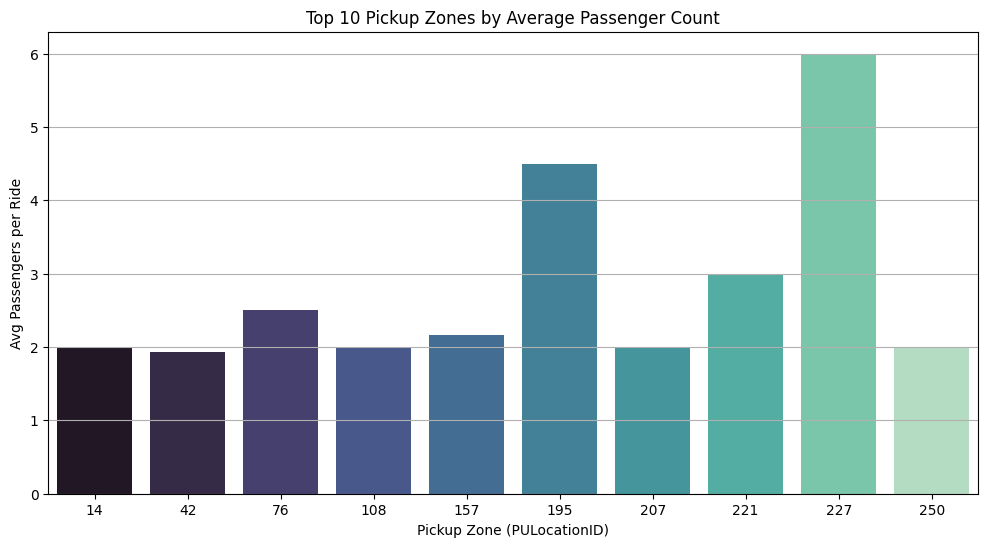

In [365]:
# A. Average passenger count by pickup zone
pickup_avg_pass = merged_df.groupby('PULocationID')['passenger_count'].mean().reset_index()
pickup_avg_pass.columns = ['ZoneID', 'Avg_Passenger_Count']
top_pickup_zones = pickup_avg_pass.sort_values(by='Avg_Passenger_Count', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_pickup_zones, x='ZoneID', y='Avg_Passenger_Count', palette='mako')
plt.title('Top 10 Pickup Zones by Average Passenger Count')
plt.xlabel('Pickup Zone (PULocationID)')
plt.ylabel('Avg Passengers per Ride')
plt.grid(True, axis='y')
plt.show()

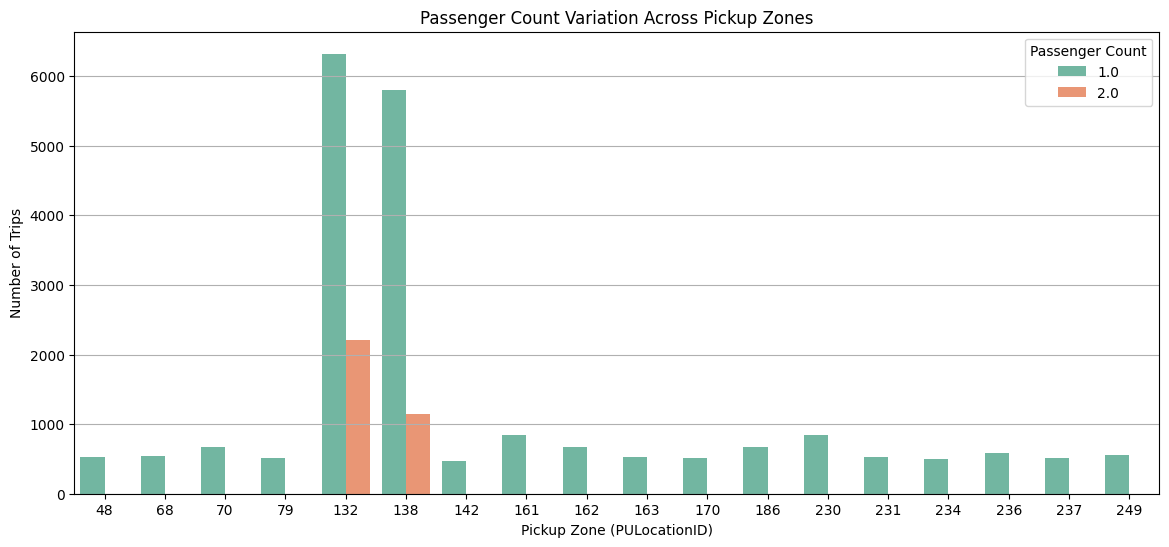

In [367]:
# How does passenger count vary across zones
# B. How passenger count varies across zones

# Step 1: Group by passenger count and pickup zones
passenger_zone_counts = merged_df.groupby(['passenger_count', 'PULocationID']).size().reset_index(name='trip_count')

# Step 2: Filter for most frequent combinations (optional: top 200)
top_combinations = passenger_zone_counts.sort_values(by='trip_count', ascending=False).head(20)

plt.figure(figsize=(14, 6))
sns.barplot(data=top_combinations, x='PULocationID', y='trip_count', hue='passenger_count', palette='Set2')
plt.title('Passenger Count Variation Across Pickup Zones')
plt.xlabel('Pickup Zone (PULocationID)')
plt.ylabel('Number of Trips')
plt.legend(title='Passenger Count')
plt.grid(True, axis='y')
plt.show()


<Figure size 1200x1000 with 0 Axes>

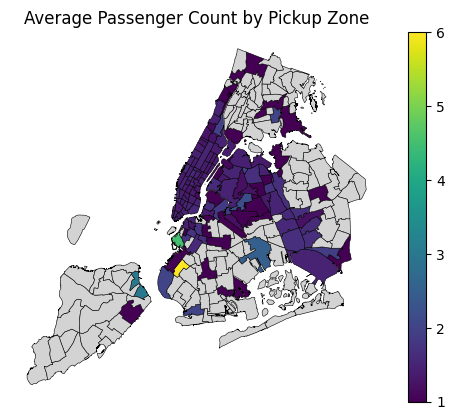

In [369]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Step 1: Group merged_df to get average passenger count for each zone
avg_passenger_by_zone = merged_df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_by_zone.columns = ['LocationID', 'avg_passenger_count']

# Step 2: Merge with zones_with_trips GeoDataFrame (assuming it has a 'LocationID' column)
zones_with_trips = zones_with_trips.merge(avg_passenger_by_zone, on='LocationID', how='left')

# Step 3: Plotting the average passenger count by zone
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
zones_with_trips.plot(column='avg_passenger_count',
                      cmap='viridis',
                      legend=True,
                      edgecolor='black',
                      linewidth=0.4,
                      missing_kwds={'color': 'lightgrey', 'label': 'No Data'})

plt.title('Average Passenger Count by Pickup Zone')
plt.axis('off')
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [373]:
# How often is each surcharge applied?
# List of surcharge columns
surcharge_columns = ['extra', 'congestion_surcharge', 'airport_fee_combined', 'improvement_surcharge']

# Calculate how many trips have each surcharge applied (value > 0)
surcharge_frequencies = merged_df[surcharge_columns].apply(lambda x: (x > 0).sum()).reset_index()
surcharge_frequencies.columns = ['Surcharge', 'Frequency']

print("Frequency of each surcharge:")
print(surcharge_frequencies)


Frequency of each surcharge:
               Surcharge  Frequency
0                  extra      28591
1   congestion_surcharge      34627
2   airport_fee_combined      17029
3  improvement_surcharge      41970


In [375]:
# Initialize an empty DataFrame to store results
zone_surcharge_counts = pd.DataFrame()

# For each surcharge column, calculate counts per pickup zone
for surcharge in surcharge_columns:
    counts = merged_df[merged_df[surcharge] > 0].groupby('PULocationID').size().reset_index(name=surcharge + '_count')
    if zone_surcharge_counts.empty:
        zone_surcharge_counts = counts
    else:
        zone_surcharge_counts = zone_surcharge_counts.merge(counts, on='PULocationID', how='outer')

# Fill NaN with 0 for zones without that surcharge
zone_surcharge_counts.fillna(0, inplace=True)

# Show top 5 zones with highest 'extra' surcharge frequency as example
print(zone_surcharge_counts.sort_values(by='extra_count', ascending=False).head(5))

     PULocationID  extra_count  congestion_surcharge_count  \
60            138       7404.0                      5454.0   
57            132       4286.0                      5576.0   
112           230        872.0                      1219.0   
75            161        793.0                      1099.0   
28             70        766.0                       674.0   

     airport_fee_combined_count  improvement_surcharge_count  
60                       7389.0                         7496  
57                       8814.0                         9352  
112                         5.0                         1301  
75                          1.0                         1155  
28                        639.0                          902  


## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

Conclusion-

Final Insights from the Analysis
Our comprehensive analysis of taxi trip data over various zones, times of day, and days of the week revealed critical patterns affecting demand, pricing, and operational efficiency:

Demand Peaks: Demand is highest during daytime peak hours (6 AM to 10 PM), particularly in key zones like central business districts and transport hubs.

Nighttime Demand: Though overall volume decreases at night (11 PM to 5 AM), demand is concentrated in specific zones such as airports and nightlife areas.

Fare Variability: Average fare per mile varies significantly by time of day, day of the week, trip distance, and passenger count.

Operational Inefficiencies: There is a mismatch between cab availability and demand in certain zones and time periods, leading to missed revenue opportunities and customer dissatisfaction.

Surcharges and Pricing: Congestion and airport surcharges are prevalent in specific zones and times, impacting trip costs and pricing strategies.


**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Increase Cab Allocation During Peak Daytime Hours (6 AM to 10 PM):
Based on demand patterns analyzed in section 3.2.2, more taxis should be deployed during these hours in high-demand zones to reduce wait times and maximize trip volume.

Implement Surge Pricing in High-Demand Zones During Peak Times:
Surge pricing in busy zones during peak daytime periods (derived from 3.2.4 and 3.2.10) will help balance demand and supply while maximizing revenue.

Dynamic Pricing Based on Time and Day:
Adjust fares dynamically considering the day of the week and hour of the day to reflect demand variability, as shown by fare-per-mile analysis in sections 3.2.4 and 3.2.10.

Increase Nighttime Cab Availability in High-Demand Zones:
From the analysis of night hours (11 PM to 5 AM) in section 3.2.7, allocating more vehicles in zones with concentrated demand (e.g., airports, entertainment districts) will improve service and revenue.

Implement Intelligent Repositioning Algorithms:
Use data-driven repositioning of idle cabs to match surges in demand, particularly during transition hours and in zones with fluctuating demand, to reduce idle time and increase efficiency.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

Strategic Summary
To meet customer demand and optimize supply effectively, the taxi service should focus on location-specific and time-sensitive strategies:

Deploy more vehicles in high-traffic zones during morning and evening peak hours on weekdays.

Prioritize airport and nightlife zones during night hours to capture late-night demand.

Apply tiered and dynamic pricing based on trip distance, passenger count, and temporal factors.

Monitor surcharge impacts and communicate pricing clearly to maintain customer satisfaction.

By integrating these insights into operational planning, the service can improve resource utilization, increase profitability, and enhance customer experience.




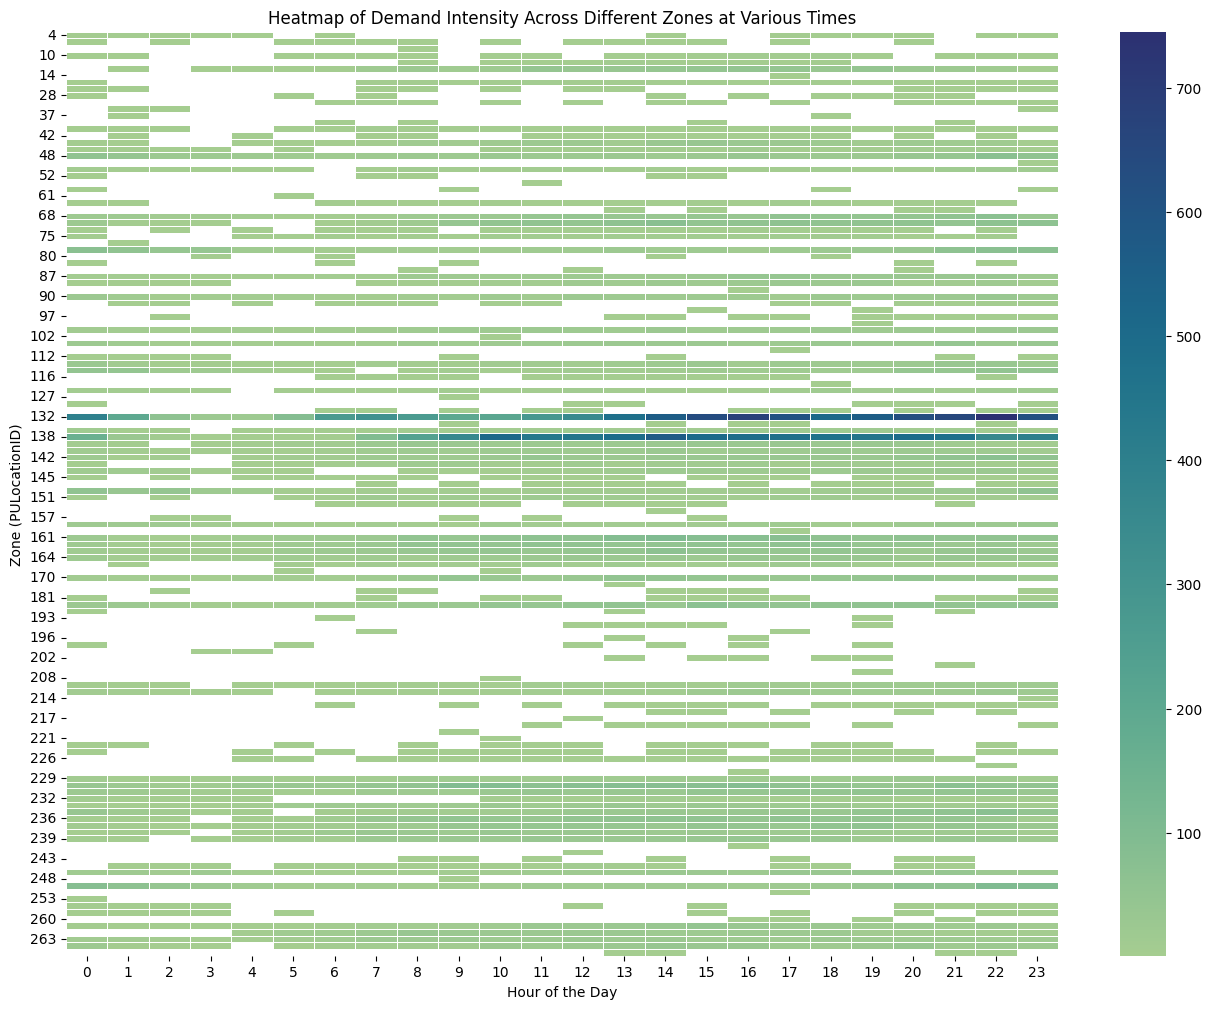

In [386]:

# Aggregate trip counts and passenger counts by zone and time
demand_data = merged_df.groupby(['PULocationID', 'pickup_time_derived']).agg({
    'passenger_count': 'sum',
    'PULocationID': 'count'
}).rename(columns={'PULocationID': 'trip_count'}).reset_index()

# Pivot the data to create a matrix for the heatmap
heatmap_data = demand_data.pivot(index='PULocationID', columns='pickup_time_derived', values='trip_count')

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(heatmap_data, cmap="crest", linewidths=0.5)
plt.title('Heatmap of Demand Intensity Across Different Zones at Various Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Zone (PULocationID)')
plt.show()


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

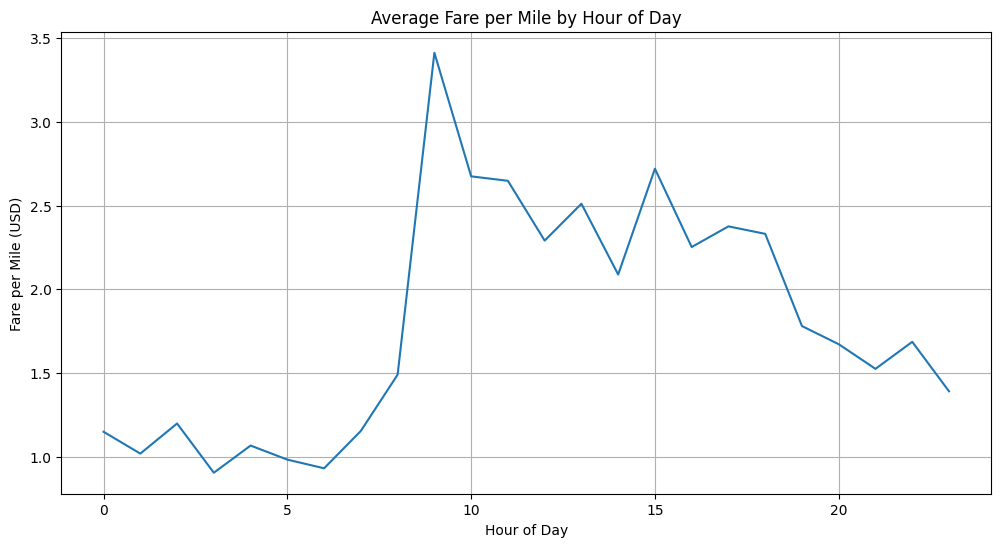

In [396]:
merged_df['fare_per_mile'] = merged_df['fare_amount'] / merged_df['trip_distance']
hourly_fare = merged_df.groupby('pickup_time_derived')['fare_per_mile'].mean().reset_index()

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.lineplot(x='pickup_time_derived', y='fare_per_mile', data=hourly_fare)
plt.title('Average Fare per Mile by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fare per Mile (USD)')
plt.grid(True)
plt.show()

✅ 1. Implement Tiered Pricing Based on Distance
From section 3.2.12:

Short trips (≤2 miles): These had a higher fare per mile, possibly due to base fare effects.

✅ Recommendation: Offer discounted short-trip packages to boost frequency of usage.

Medium trips (2–5 miles): Optimal pricing zone. Revenue was balanced.

✅ Recommendation: Maintain or slightly increase fare here during high demand hours.

Long trips (>5 miles): Lower fare/mile, but higher total fare.

✅ Recommendation: Introduce flat rates or capped pricing to attract long-distance riders.

✅ 2. Optimize Pricing by Time of Day
From 3.2.10 and 3.2.4:

Late-night hours (11PM–5AM) showed lower demand but higher fare/mile.

✅ Recommendation: Maintain higher pricing here, but provide loyalty benefits or coupons for frequent riders to encourage usage.

Peak hours (7–10AM and 5–8PM): Showed consistent demand and profitability.

✅ Recommendation: Introduce mild surge pricing during these windows.

✅ 3. Adjust Pricing Based on Passenger Count
From 3.2.9:

As passenger count increases, fare per passenger per mile decreases.

✅ Recommendation: Introduce group-ride incentives or fixed group fares to improve utilization.

✅ 4. Vendor-Specific Price Adjustment
From 3.2.11:

Vendor 2 had slightly higher fare per mile than Vendor 1.

✅ Recommendation: Use dynamic pricing algorithms to keep Vendor 1 competitive while allowing Vendor 2 to dominate premium segments.

✅ 5. Use Congestion and Surcharges Strategically
From 3.2.16:

Surcharges are more common during busy urban times/zones.

✅ Recommendation: Transparently communicate surcharges and waive off airport/congestion surcharges during off-peak times to attract more users.


In [ ]:
import shutil

shutil.make_archive('my_assignment', 'zip', r'C:\Users\acer\OneDrive\Desktop\my assignment')